In [1]:
#importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
#from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

In [2]:
# reading train data into train and changing the index column to Id
train = pd.read_csv('House_Price_Extracted/train.csv',index_col='Id')

In [3]:
#checking train head
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# reading the test data into test
test=pd.read_csv('House_Price_Extracted/test.csv',index_col='Id')

In [5]:
#checking head
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#checking Train features
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
#checking train shape for (rows,columns)
train.shape

(1460, 80)

In [8]:
#checking the data info of features,null count, Data Types
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
# Finding the number of features with null value
train.isnull().sum()[train.isnull().sum()!=0].count()

19

In [10]:
# Finding the null value in each features
train.isnull().sum()[train.isnull().sum()!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
# Finding the null value with percentage, perc = (total null value / 1460(row length))*100
((train.isnull().sum()[train.isnull().sum()!=0])/14.60).sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [12]:
#droping features with more than 47% null values
cols = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
train = train.drop(cols, axis=1)

In [13]:
#cross checking the features after drop
((train.isnull().sum()[train.isnull().sum()!=0])/14.60).sort_values(ascending=False)

LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [14]:
# Refering features data type, To replace the null value with
# mode() - Object
# mean() - float
cols=['LotFrontage','GarageCond','GarageQual','GarageFinish','GarageYrBlt','GarageType','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond'
     ,'BsmtQual','MasVnrArea','MasVnrType','Electrical']
train[cols].dtypes

LotFrontage     float64
GarageCond       object
GarageQual       object
GarageFinish     object
GarageYrBlt     float64
GarageType       object
BsmtFinType2     object
BsmtExposure     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

In [15]:
# Assigning the float feature to col_float
# Assigning the object feature to col_object
cols_float=['LotFrontage','GarageYrBlt','MasVnrArea']
cols_object=['GarageCond','GarageQual','GarageFinish','GarageType','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical']

In [16]:
train[cols_float].mean()

LotFrontage      70.049958
GarageYrBlt    1978.506164
MasVnrArea      103.685262
dtype: float64

In [17]:
# Finding the mode of object features
train[cols_object].mode()

,GarageCond,GarageQual,GarageFinish,GarageType,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,Electrical
0,TA,TA,Unf,Attchd,Unf,No,Unf,TA,TA,None,SBrkr


In [18]:
train['LotFrontage']=train['LotFrontage'].replace(np.nan, 70.0) #float32
train['GarageCond']=train['GarageCond'].replace(np.nan, 'TA') #object
train['GarageQual']=train['GarageQual'].replace(np.nan, 'TA') #object
train['GarageFinish']=train['GarageFinish'].replace(np.nan, 'Unf') #object
train['GarageYrBlt']=train['GarageYrBlt'].replace(np.nan, 1978.0) #float64
train['GarageType']=train['GarageType'].replace(np.nan, 'Attchd') #object
train['BsmtFinType2']=train['BsmtFinType2'].replace(np.nan, 'Unf') #object
train['BsmtExposure']=train['BsmtExposure'].replace(np.nan, 'No') #object
train['BsmtFinType1']=train['BsmtFinType1'].replace(np.nan, 'Unf') #object
train['BsmtCond']=train['BsmtCond'].replace(np.nan, 'TA') #object
train['BsmtQual']=train['BsmtQual'].replace(np.nan, 'TA') #object
train['MasVnrArea']=train['MasVnrArea'].replace(np.nan, 103.0) #float64
train['MasVnrType']=train['MasVnrArea'].replace(np.nan, 'None') #object
train['Electrical']=train['Electrical'].replace(np.nan, 'SBrkr') #object

In [19]:
# checking the null values again
train.isnull().sum()[train.isnull().sum()!=0].count()

0

# Visualization

most of the features are correlated with each other like Garage Cars and Garage Area, isnt it?

OverallQual is highly correlated with target feature SalePrice 0.79 can you see. we'll see how it effected the saleprice in below graph.

In [20]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

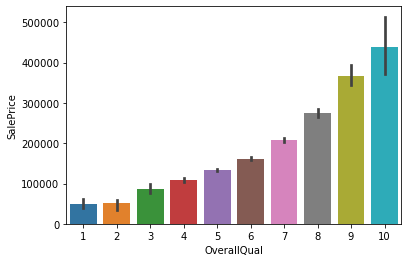

In [21]:
sns.barplot(train.OverallQual,train.SalePrice)

In [22]:
# list of numerical variables
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  38


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [23]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [24]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

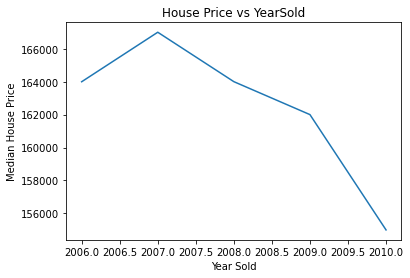

In [25]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

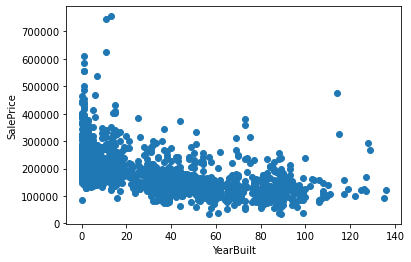

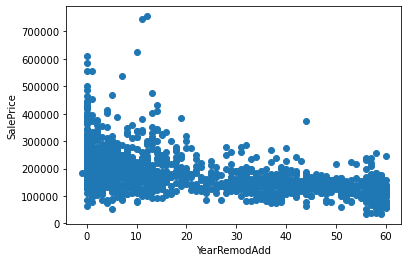

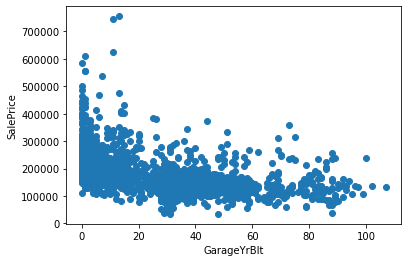

In [26]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=train.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [27]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


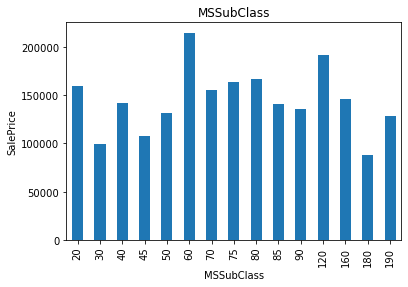

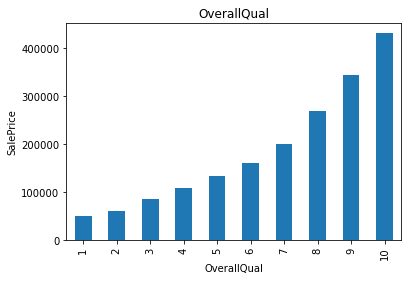

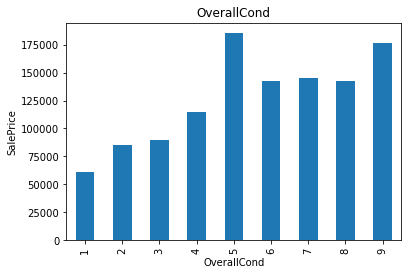

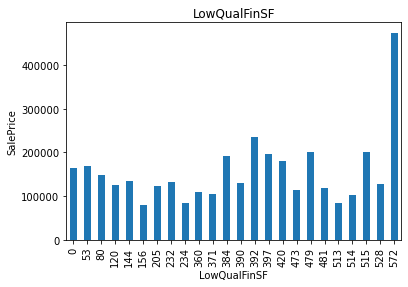

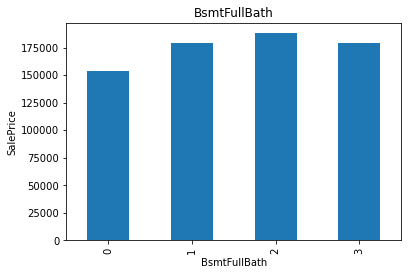

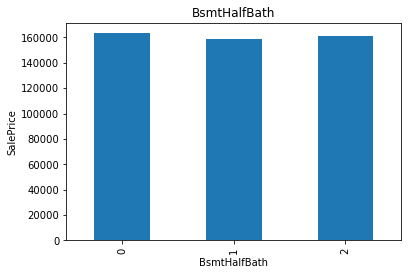

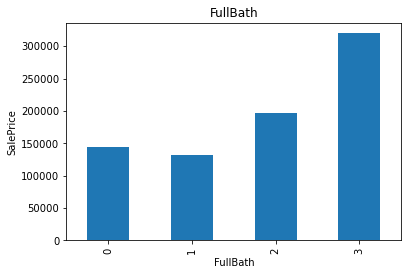

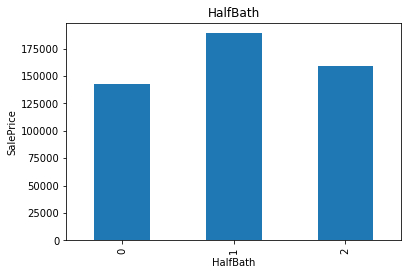

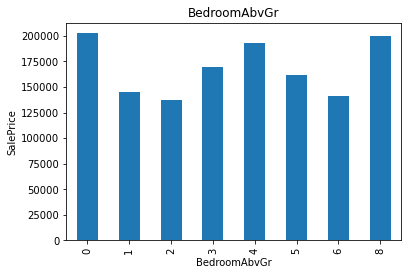

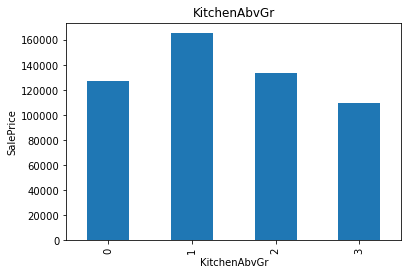

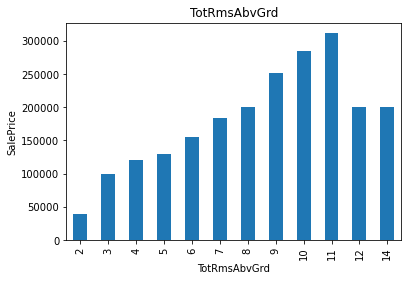

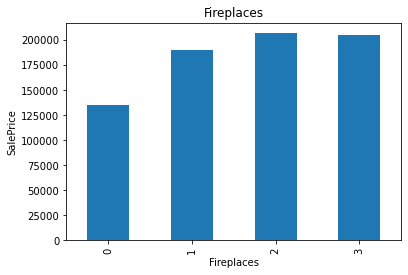

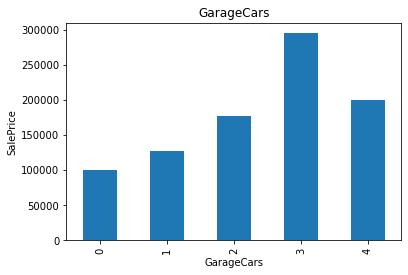

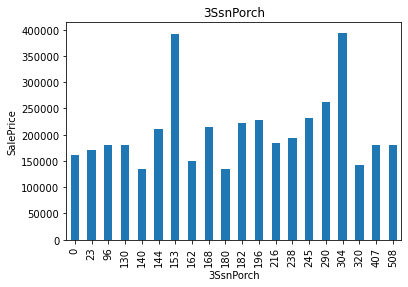

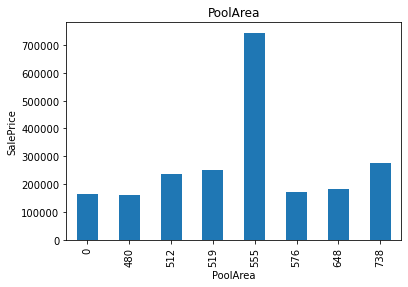

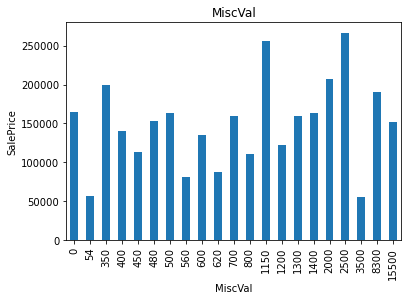

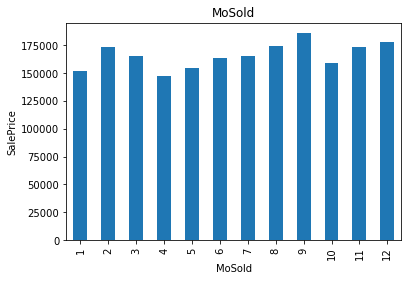

In [28]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [29]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 17


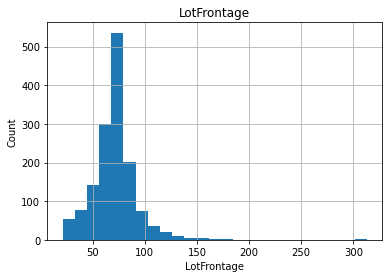

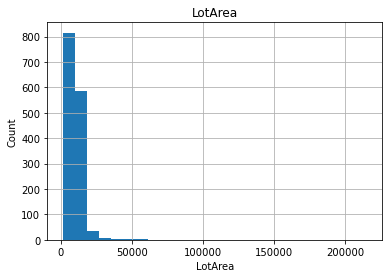

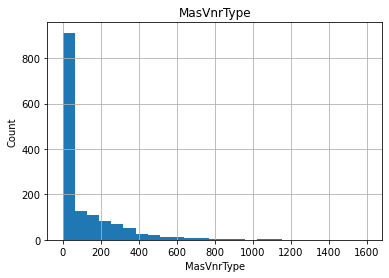

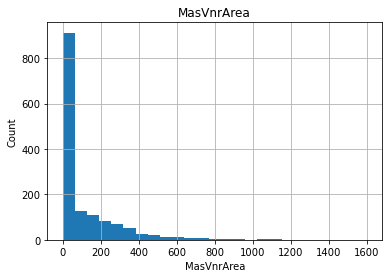

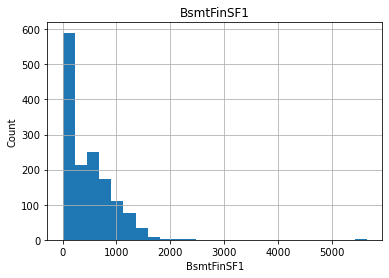

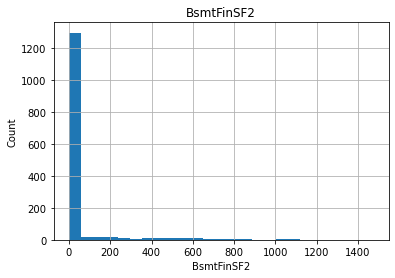

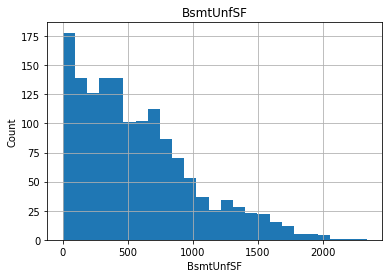

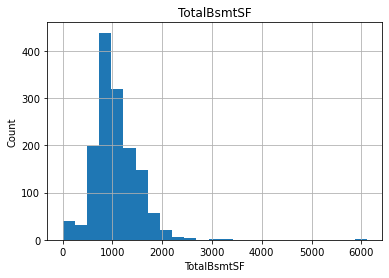

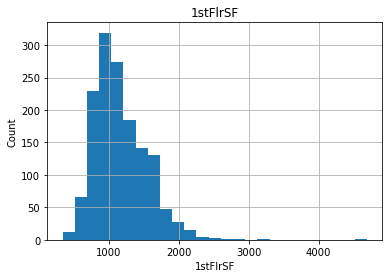

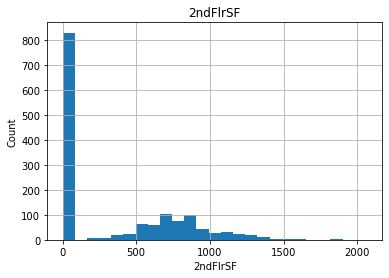

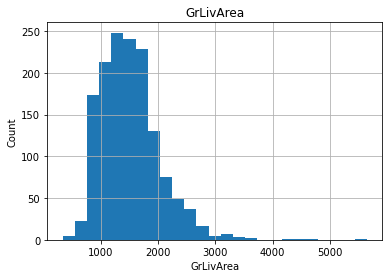

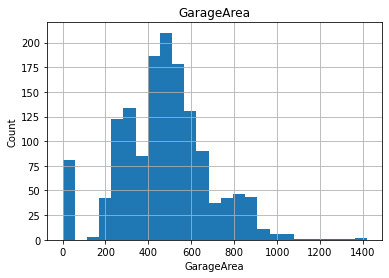

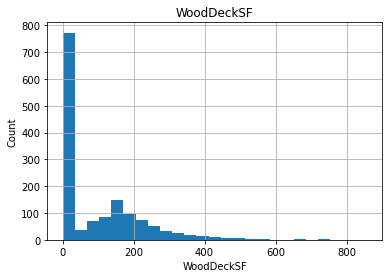

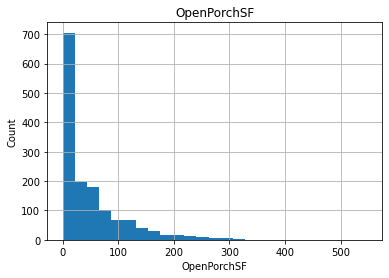

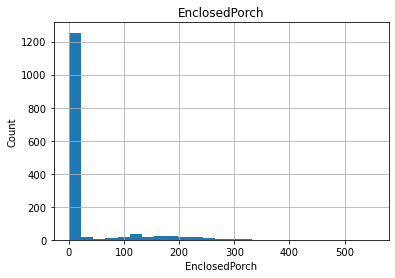

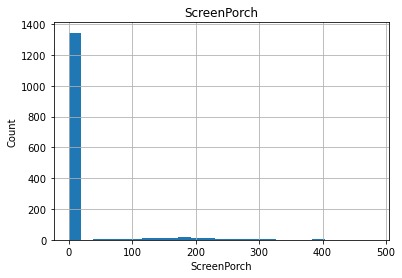

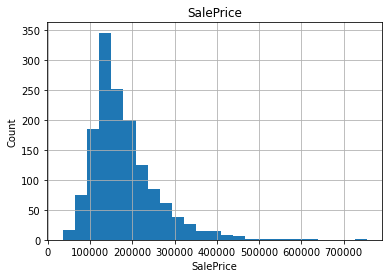

In [30]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

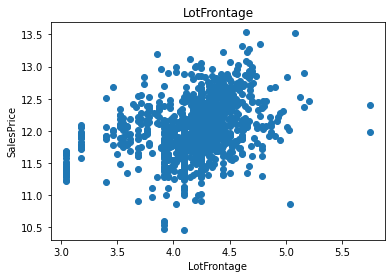

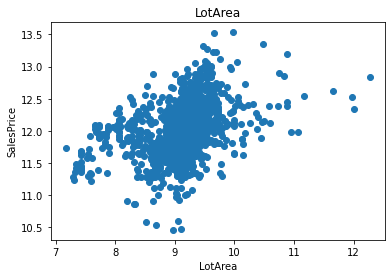

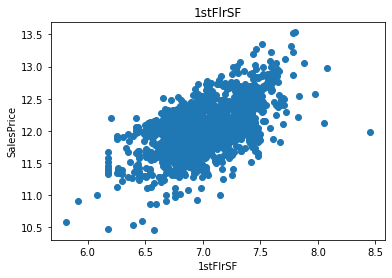

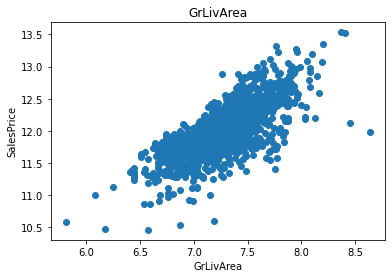

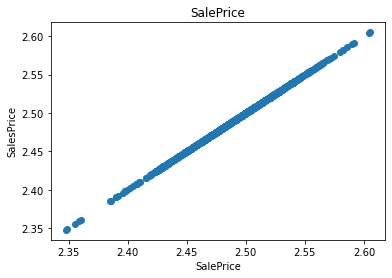

In [31]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [32]:
categorical_features=[feature for feature in train.columns if data[feature].dtypes=='O']


In [33]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is ExterQual and number of categories are 4
The feature is ExterCond and number of c

#Find out the relationship between categorical variable and dependent feature SalesPrice

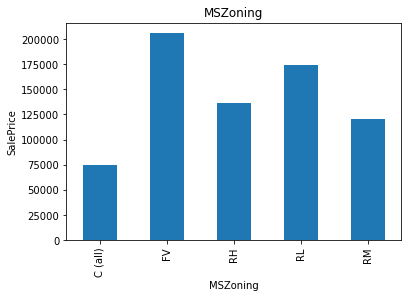

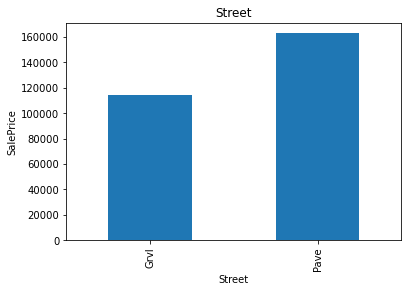

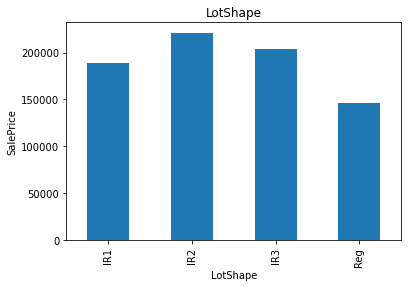

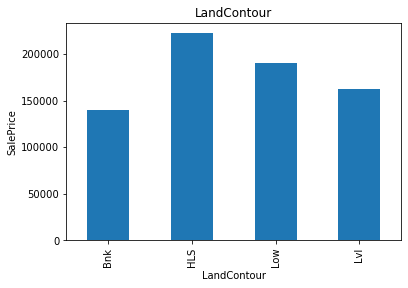

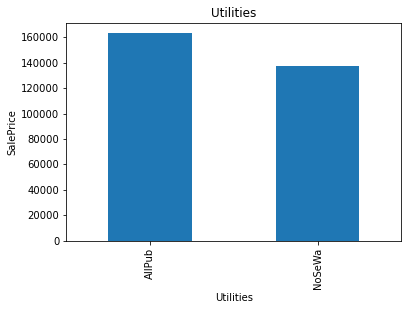

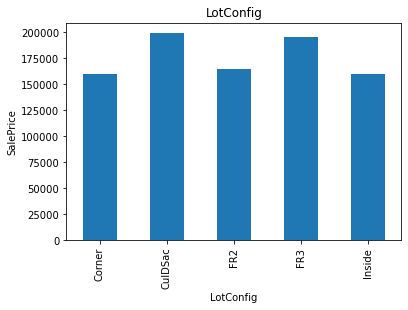

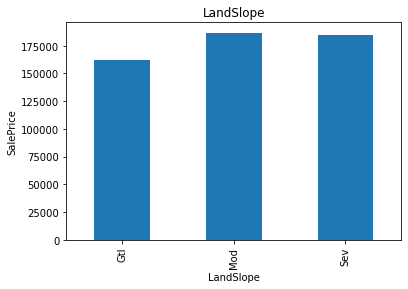

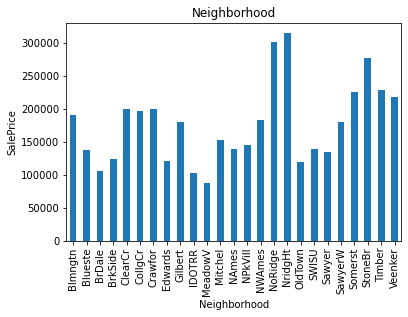

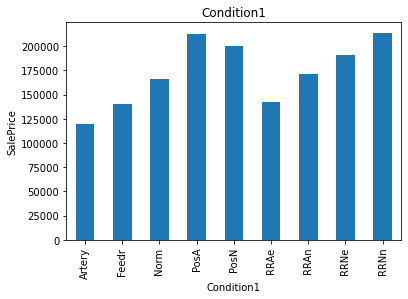

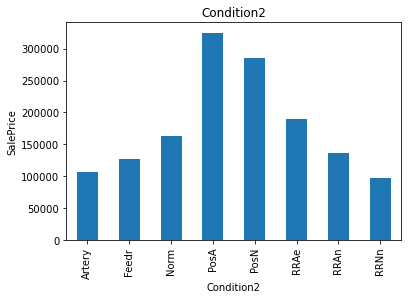

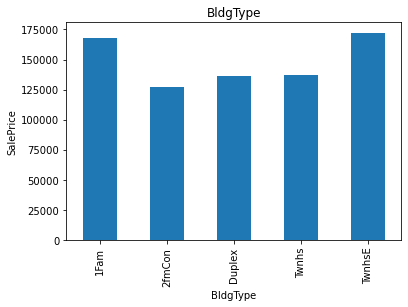

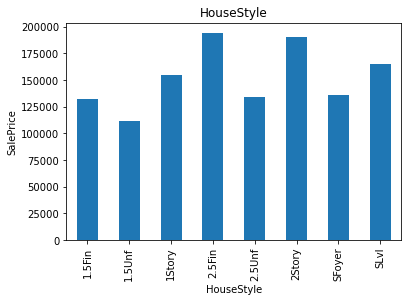

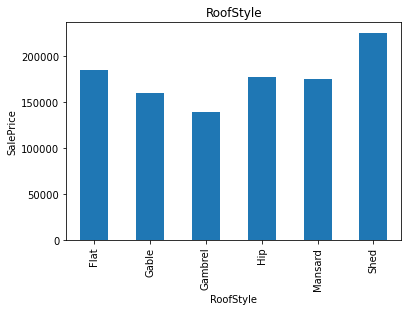

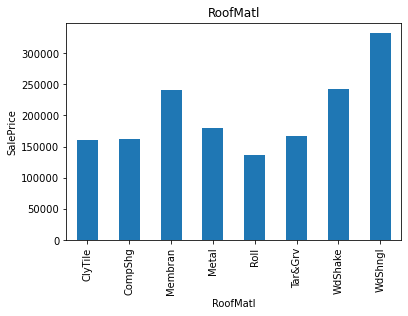

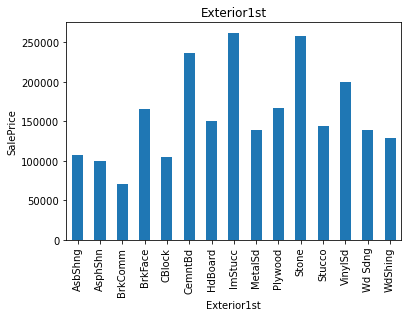

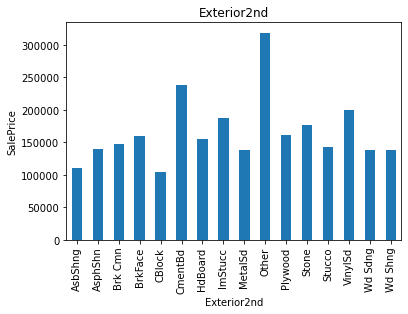

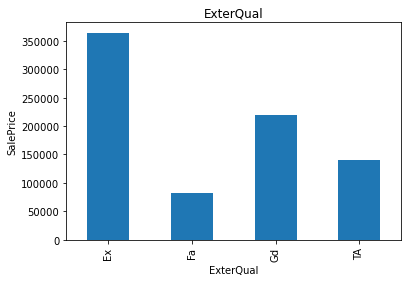

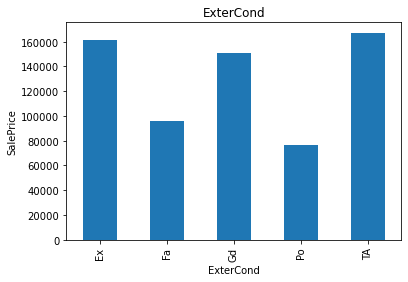

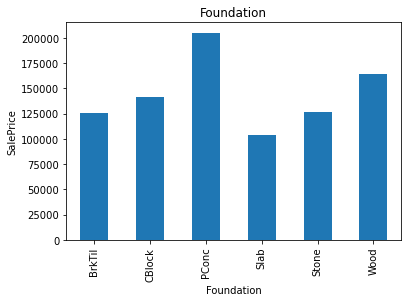

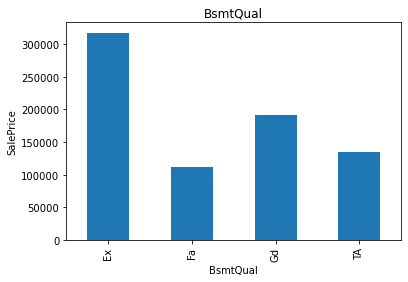

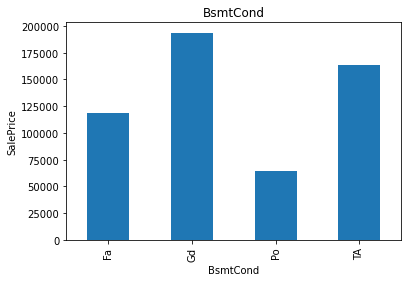

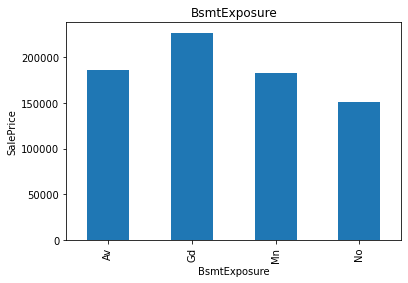

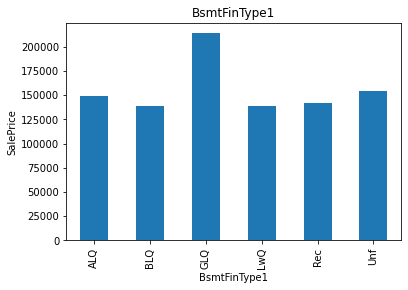

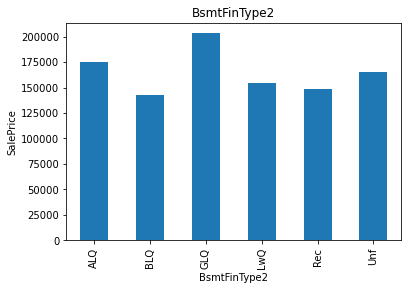

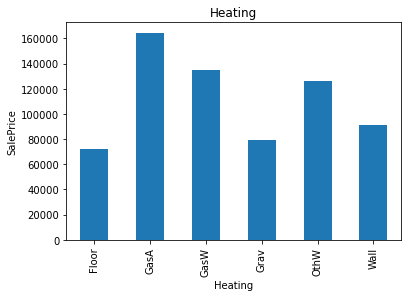

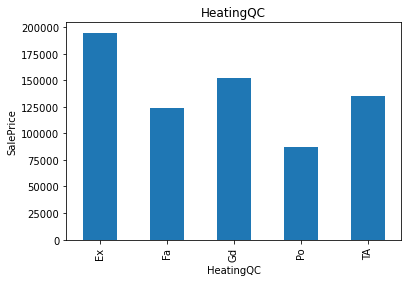

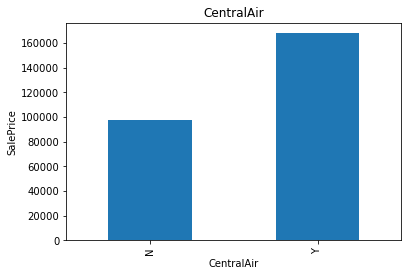

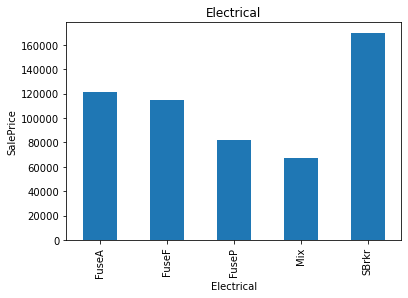

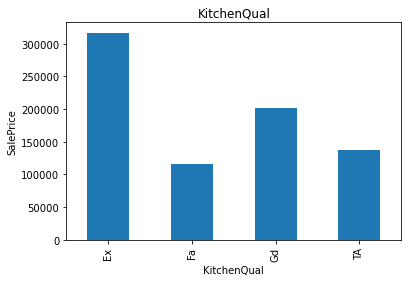

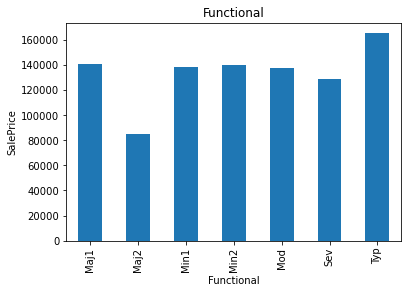

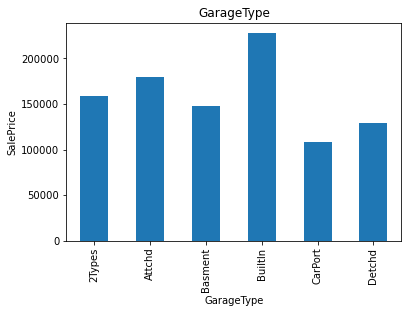

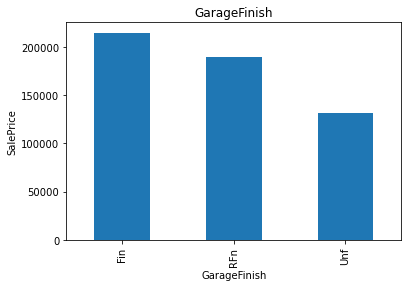

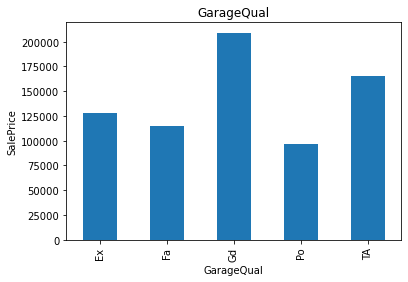

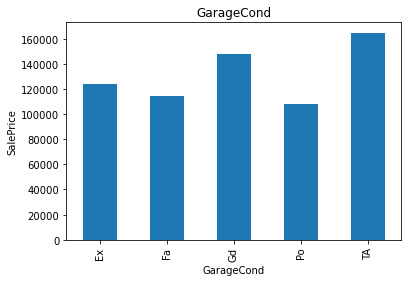

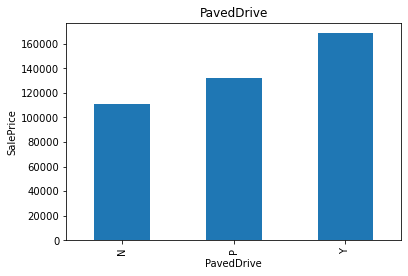

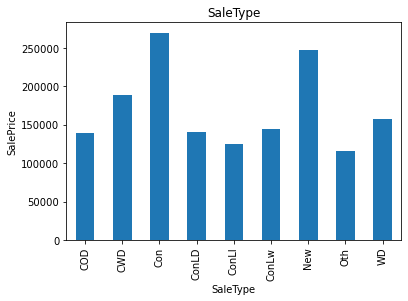

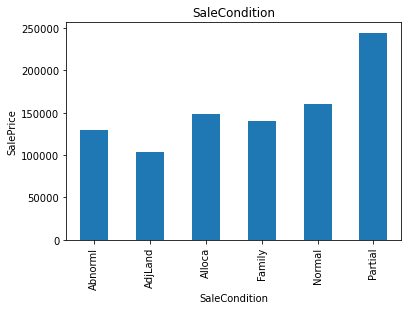

In [34]:
for feature in categorical_features:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

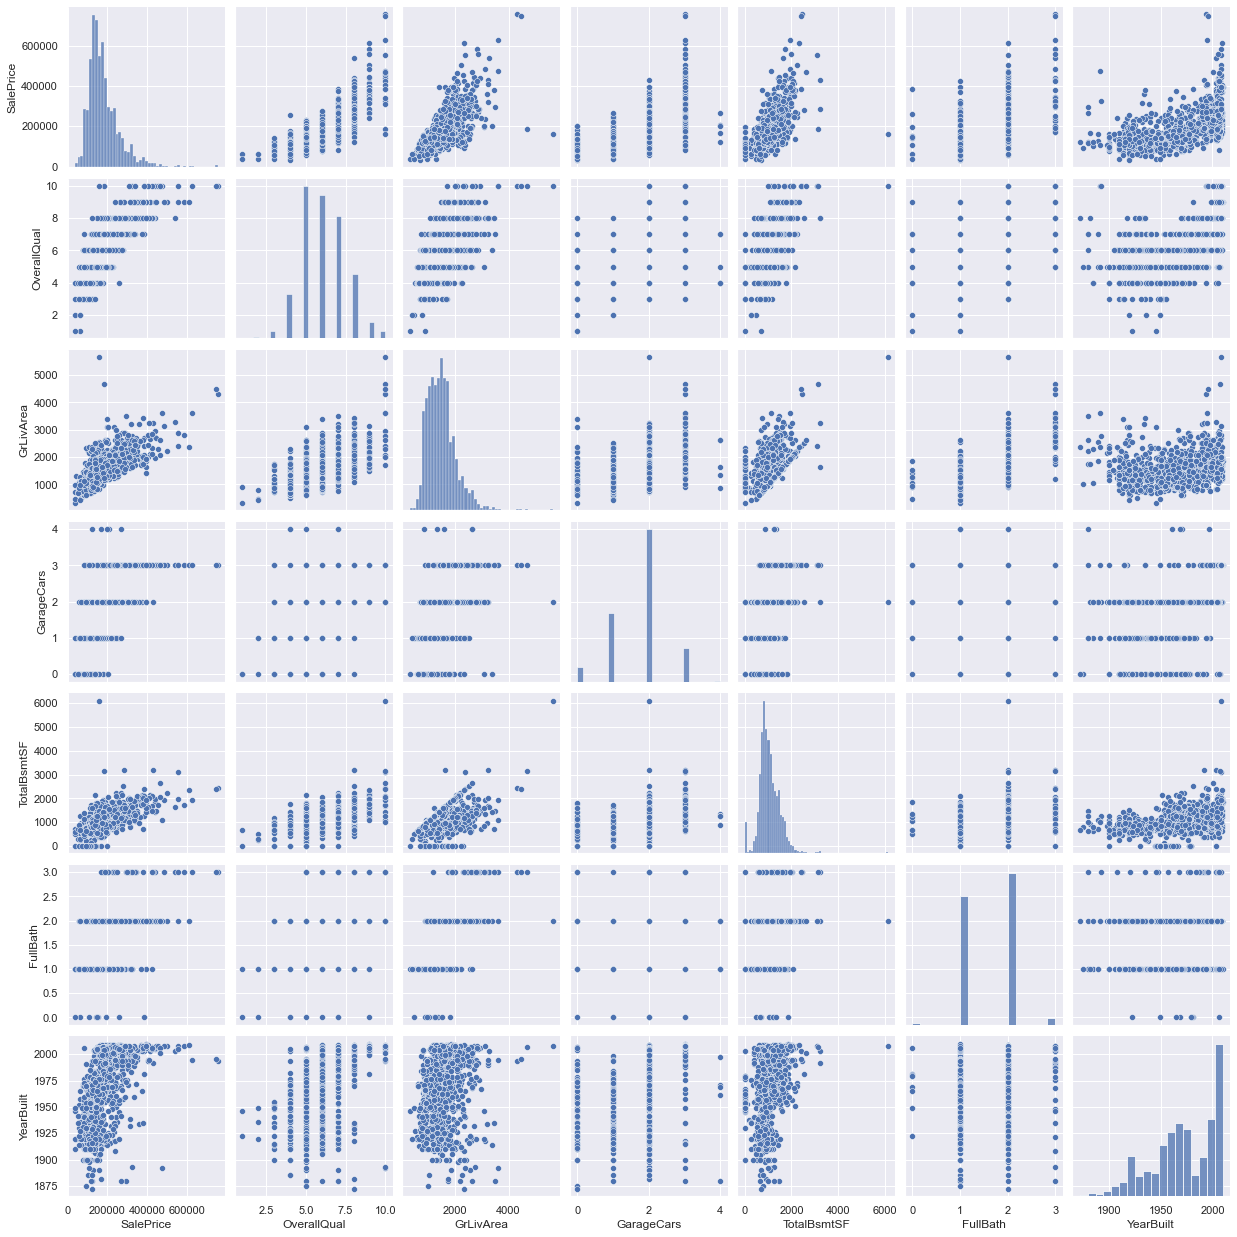

In [35]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

In [36]:
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis,norm, skew


 mu = 180921.20 and sigma = 79415.29



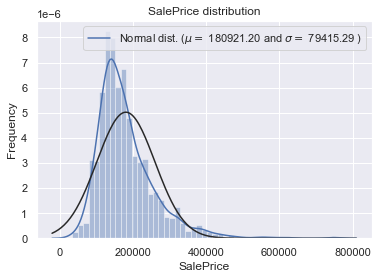

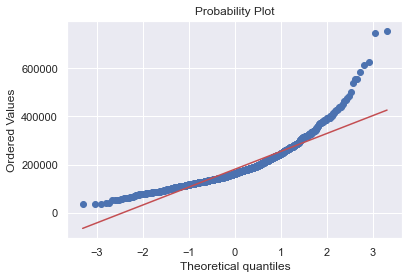

In [37]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


## Checking Correlation

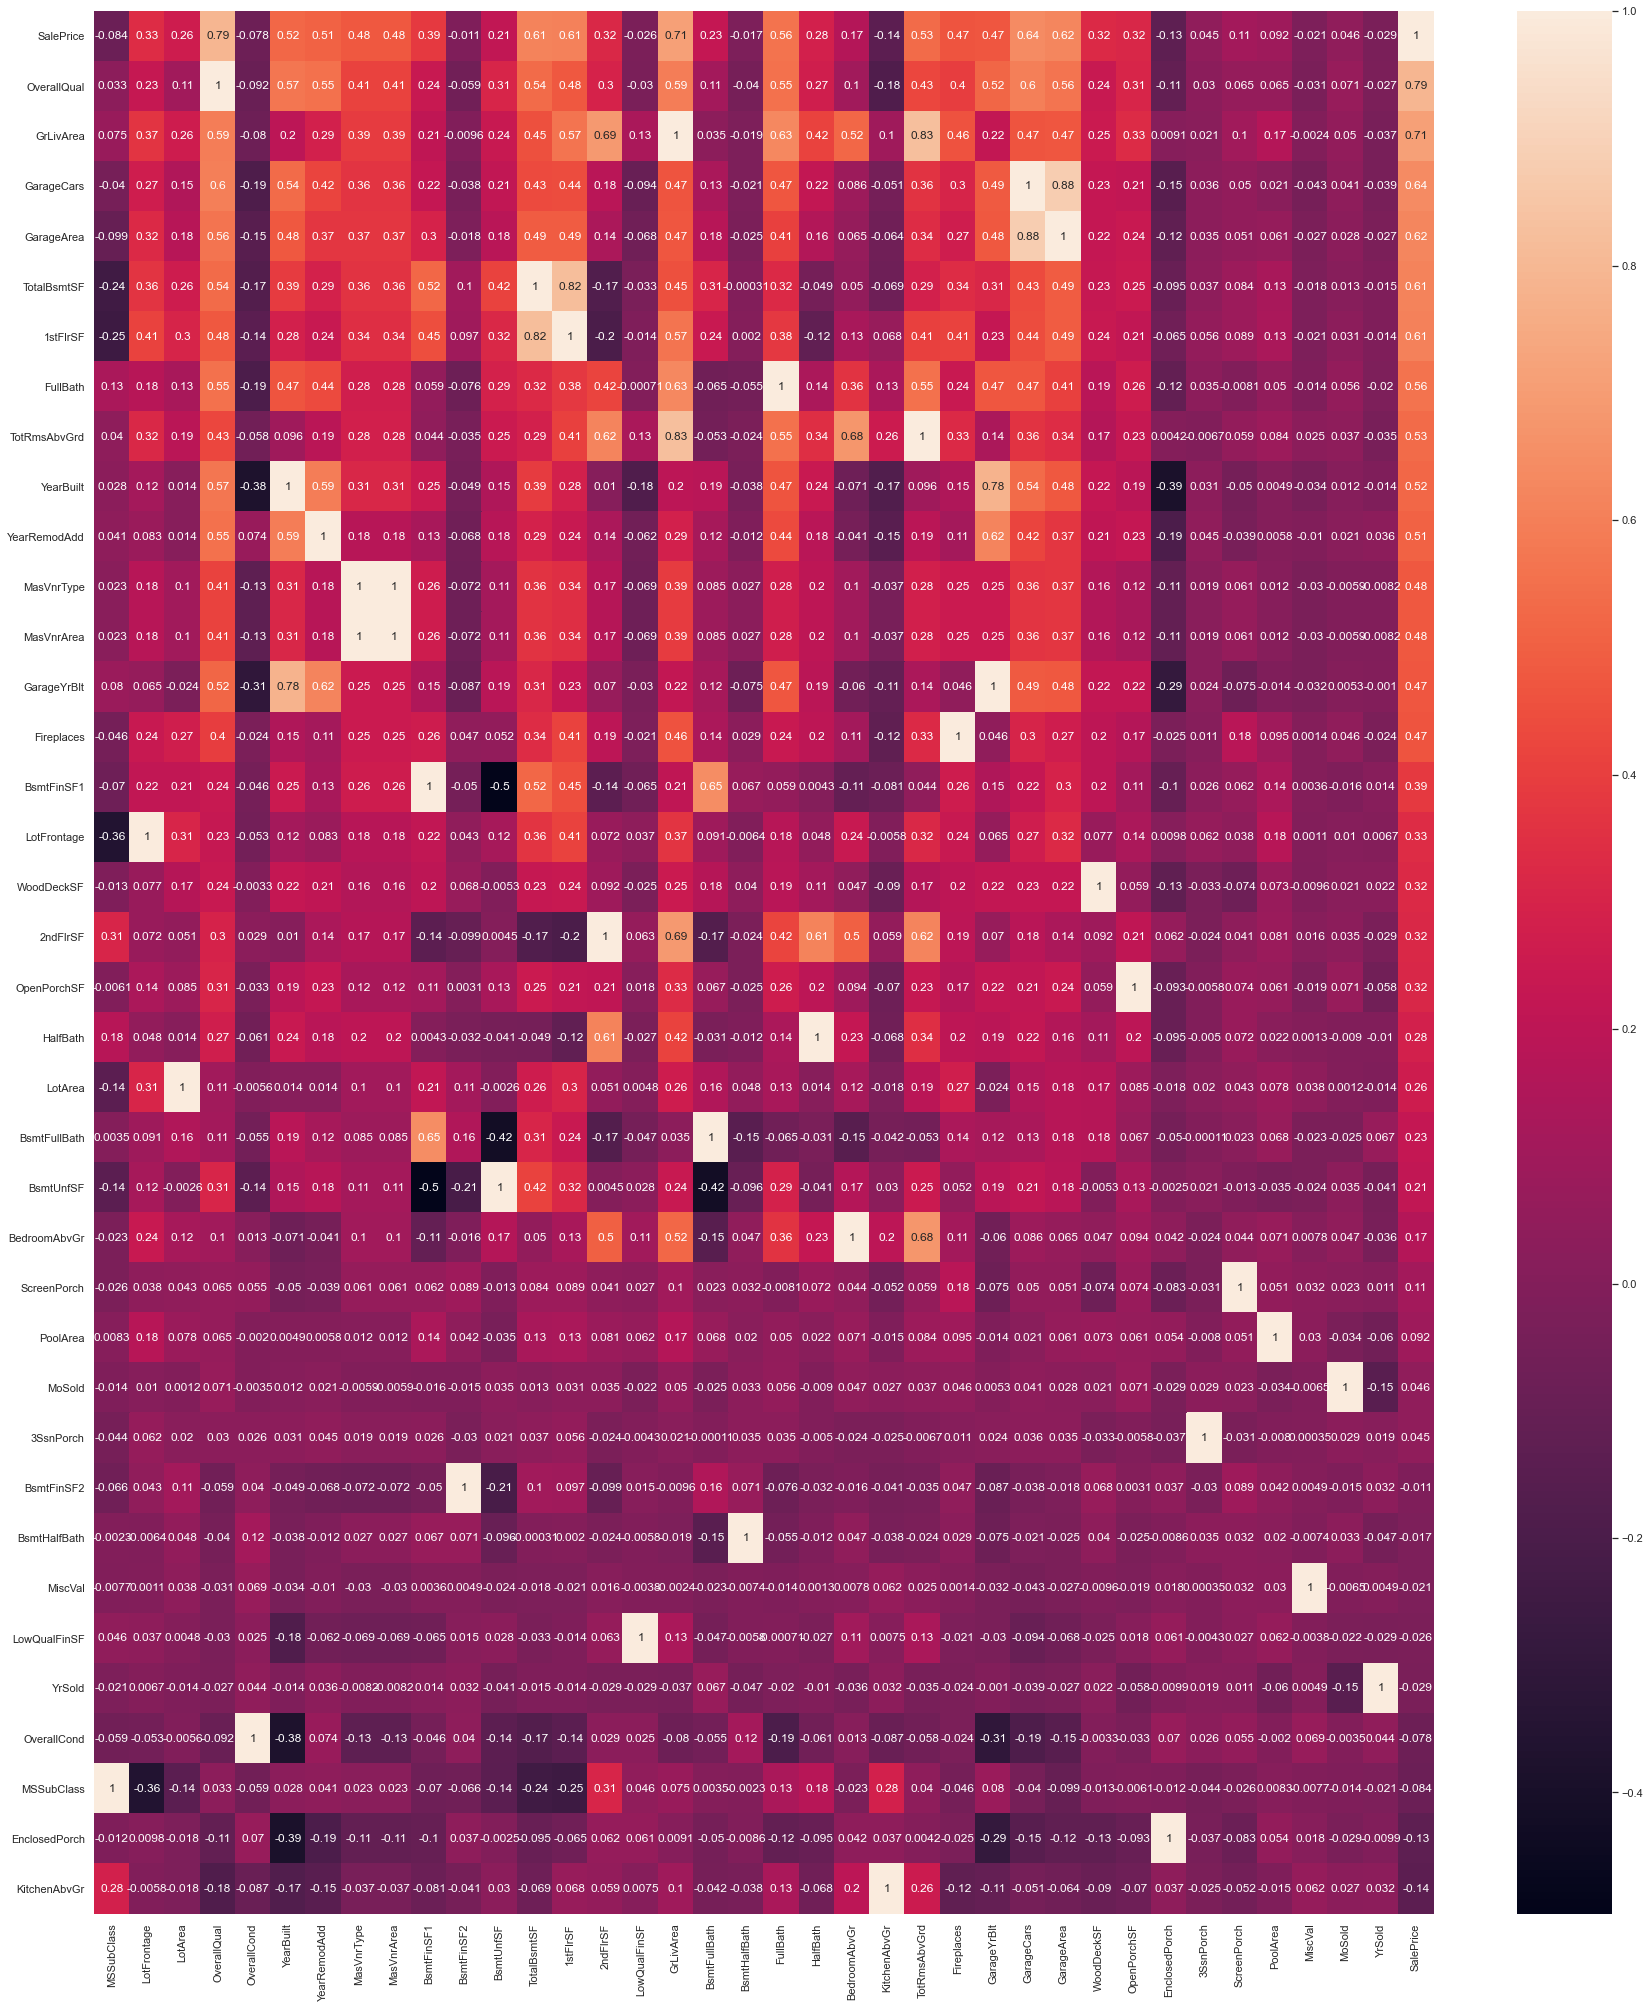

In [38]:
#checking for correlation with heatmap
trc=train.corr().sort_values(by='SalePrice',axis=0,ascending=False)
plt.figure(figsize=(30,35))
sns.heatmap(trc,annot=True)
plt.show()


In [39]:
#Negative Features Removed
train=train.drop(['BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass',
                   'EnclosedPorch','KitchenAbvGr'],axis=1)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

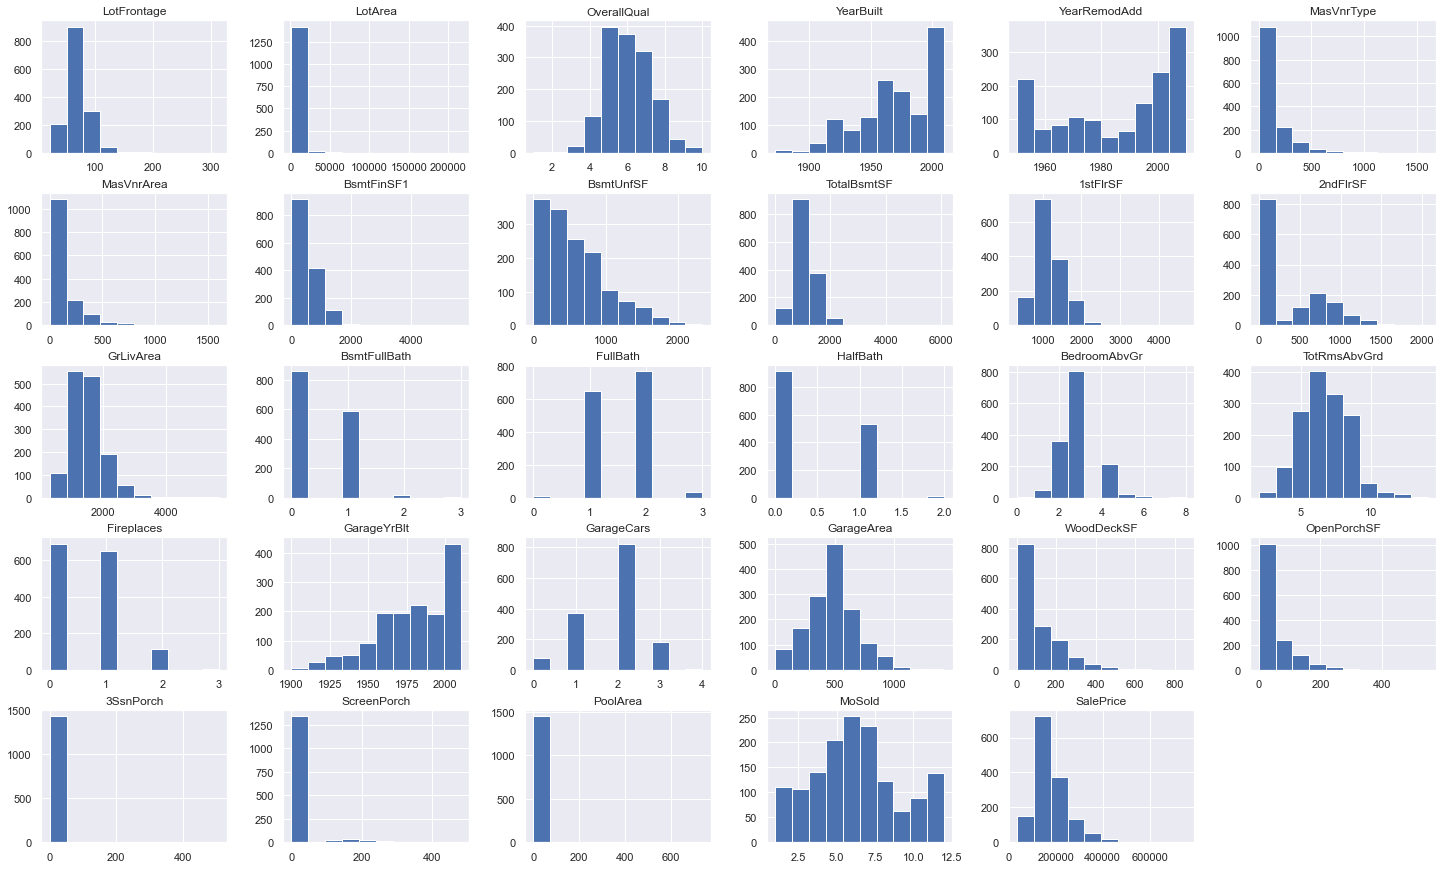

In [41]:
#checking train2 data histogram to for data skewness and kurtosis
train.hist(figsize=(25,50), grid=True, layout=(16, 6), bins = 10)
plt.show()

In [42]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  29


In [43]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [44]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 11


In [45]:
categorical_features=[feature for feature in train.columns if train[feature].dtypes=='O']

<AxesSubplot:>

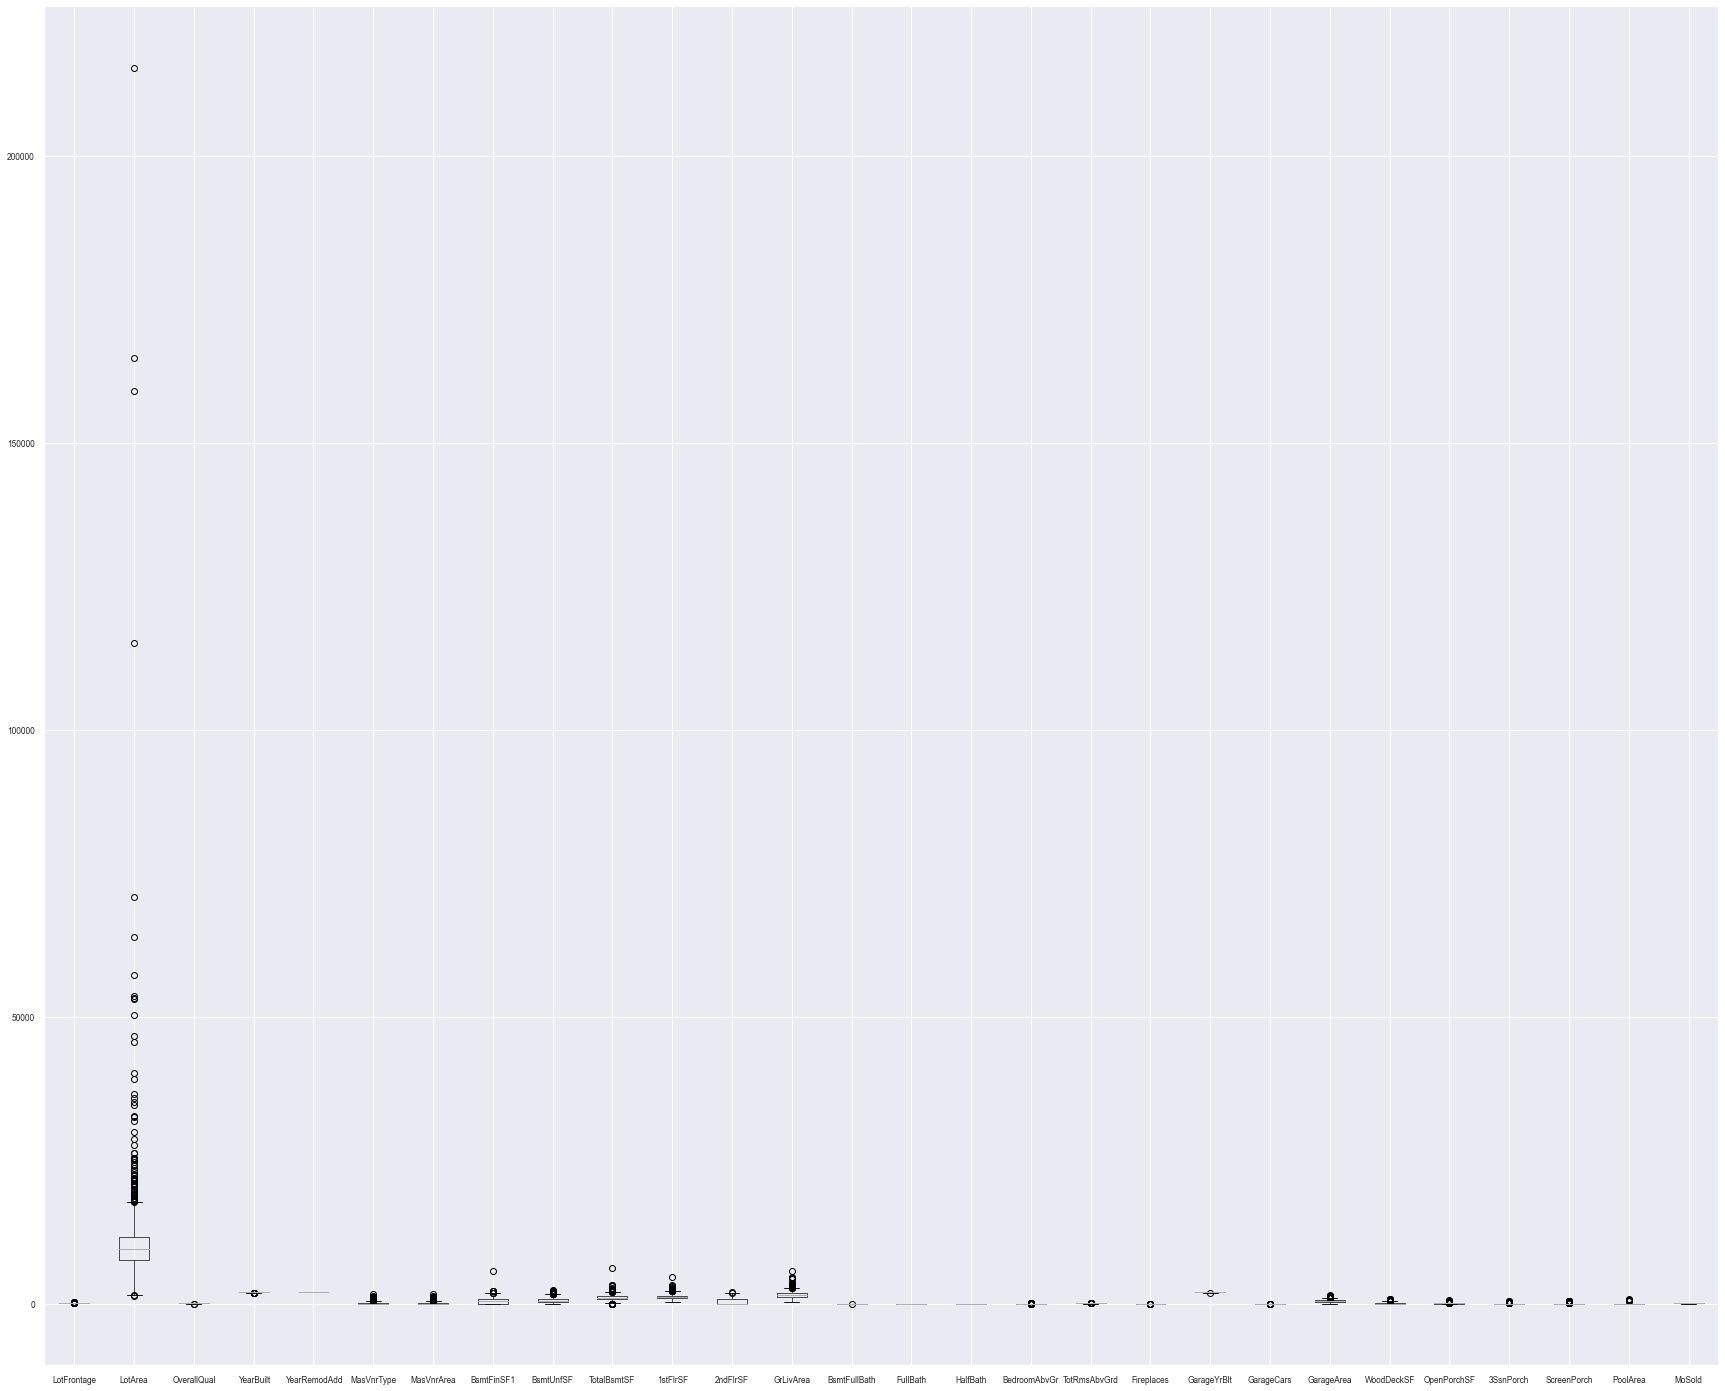

In [46]:
sns.set(font_scale=.75) 
train.iloc[:,:-1].boxplot(rot = 0, figsize=(30,25))

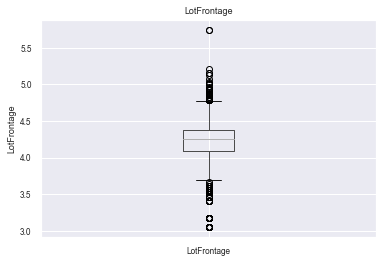

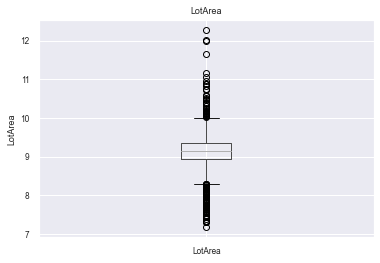

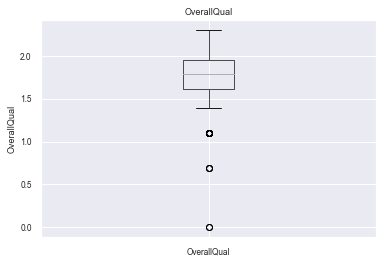

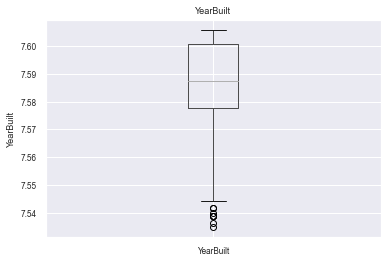

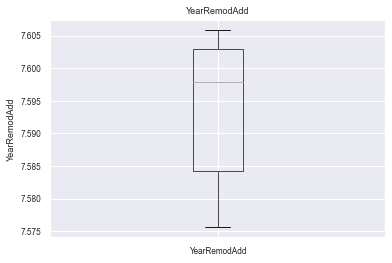

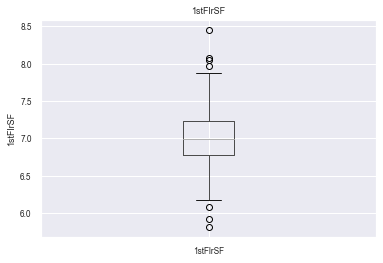

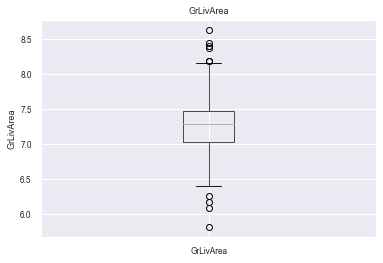

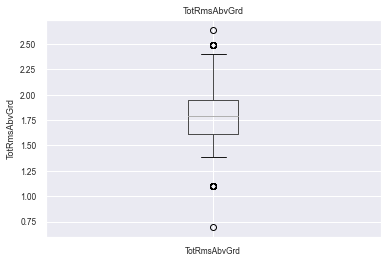

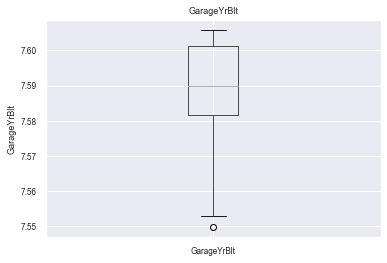

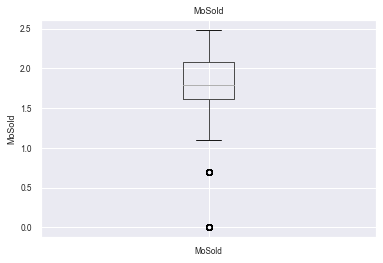

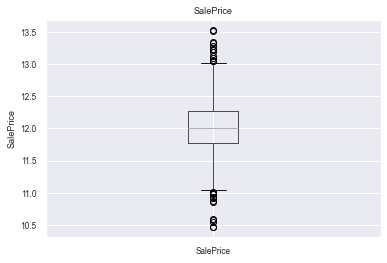

In [47]:

for feature in numerical_features :
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Checking the Skewness with 'numerical features'

In [48]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [49]:
skew_values = skew(train[numerical_features], nan_policy = 'omit')

dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
26,PoolArea,14.813135
1,LotArea,12.195142
24,3SsnPorch,10.293752
25,ScreenPorch,4.117977
5,MasVnrType,2.673723
6,MasVnrArea,2.673723
0,LotFrontage,2.383704
23,OpenPorchSF,2.361912
28,SalePrice,1.880941
7,BsmtFinSF1,1.683771


## Checking the Kurtosis with 'numerical features'

In [50]:
kurtosis_value =kurtosis(train[numerical_features])
dummy_k = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']),
                   pd.DataFrame(list(kurtosis_value), columns=['Kurtosis Degree'])], axis=1)
dummy_k.sort_values(by ='Kurtosis Degree', ascending=False)

,Features,Kurtosis Degree
26,PoolArea,222.500507
1,LotArea,202.543793
24,3SsnPorch,123.235177
0,LotFrontage,21.773108
25,ScreenPorch,18.371874
9,TotalBsmtSF,13.201042
7,BsmtFinSF1,11.076090
5,MasVnrType,10.115688
6,MasVnrArea,10.115688
23,OpenPorchSF,8.457180


## Applying Log Transformation

In [51]:
# Applying log transformation
train['PoolArea'] = np.log(train['PoolArea']+1)
train['LotArea'] = np.log(train['LotArea']+1)
train['3SsnPorch'] = np.log(train['3SsnPorch']+1)
train['ScreenPorch'] = np.log(train['ScreenPorch']+1)
train['MasVnrType'] = np.log(train['MasVnrType']+1)
train['MasVnrArea'] = np.log(train['MasVnrArea']+1)
train['LotFrontage'] = np.log(train['LotFrontage']+1)
train['OpenPorchSF'] = np.log(train['OpenPorchSF']+1)
train['SalePrice'] = np.log(train['SalePrice']+1)
train['BsmtFinSF1'] = np.log(train['BsmtFinSF1']+1)
train['WoodDeckSF'] = np.log(train['WoodDeckSF']+1)
train['TotalBsmtSF'] = np.log(train['TotalBsmtSF']+1)
train['1stFlrSF'] = np.log(train['1stFlrSF']+1)
train['GrLivArea'] = np.log(train['GrLivArea']+1)


# Checking the Skewness after Log Transformation

In [52]:
skew_values = skew(train[numerical_features], nan_policy = 'omit')

dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
26,PoolArea,14.348342
24,3SsnPorch,7.727026
25,ScreenPorch,3.147171
8,BsmtUnfSF,0.919323
11,2ndFlrSF,0.812194
17,TotRmsAbvGrd,0.675646
15,HalfBath,0.675203
18,Fireplaces,0.648898
13,BsmtFullBath,0.595454
6,MasVnrArea,0.480648


In [53]:
#removing features above 1 skewness
train=train.drop(['ScreenPorch'],axis=1)

In [54]:
#removing feature in negatibe skwness above -1
train=train.drop(['LotFrontage','3SsnPorch','TotalBsmtSF'],axis=1)

In [55]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  25


###### Checking the skewness data after removing positive and negative skewness

In [56]:
skew_values = skew(train[numerical_features], nan_policy = 'omit')

dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
22,PoolArea,14.348342
7,BsmtUnfSF,0.919323
9,2ndFlrSF,0.812194
15,TotRmsAbvGrd,0.675646
13,HalfBath,0.675203
16,Fireplaces,0.648898
11,BsmtFullBath,0.595454
4,MasVnrType,0.480648
5,MasVnrArea,0.480648
1,OverallQual,0.216721


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotArea        1460 non-null   float64
 2   Street         1460 non-null   object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [58]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in categorical_features:
    train[i] = enc.fit_transform(train[i])

In [59]:
X=train.iloc[:,:-1]

In [60]:
X.head()

,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MoSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,9.042040,1,3,3,0,4,0,5,2,2,0,5,7,2003,2003,1,1,12,13,5.283204,5.283204,2,4,2,2,3,3,2,6.561031,5,150,1,0,1,4,6.753438,854,7.444833,1,2,1,3,2,8,6,0,1,2003.0,1,2,548,4,4,2,0.000000,4.127134,0.0,2,8,4
2,3,9.169623,1,3,3,0,2,0,24,1,2,0,2,6,1976,1976,1,1,8,8,0.000000,0.000000,3,4,1,2,3,1,0,6.886532,5,284,1,0,1,4,7.141245,0,7.141245,0,2,0,3,3,6,6,1,1,1976.0,1,2,460,4,4,2,5.700444,0.000000,0.0,5,8,4
3,3,9.328212,1,0,3,0,4,0,5,2,2,0,5,7,2001,2002,1,1,12,13,5.093750,5.093750,2,4,2,2,3,2,2,6.188264,5,434,1,0,1,4,6.825460,866,7.488294,1,2,1,3,2,6,6,1,1,2001.0,1,2,608,4,4,2,0.000000,3.761200,0.0,9,8,4
4,3,9.164401,1,0,3,0,0,0,6,2,2,0,5,7,1915,1970,1,1,13,15,0.000000,0.000000,3,4,0,3,1,3,0,5.379897,5,540,1,2,1,4,6.869014,756,7.448916,1,1,0,3,2,7,6,1,5,1998.0,2,3,642,4,4,2,0.000000,3.583519,0.0,2,8,0
5,3,9.565284,1,0,3,0,2,0,15,2,2,0,5,8,2000,2000,1,1,12,13,5.860786,5.860786,2,4,2,2,3,0,2,6.486161,5,490,1,0,1,4,7.044033,1053,7.695758,1,2,1,4,2,9,6,1,1,2000.0,1,3,836,4,4,2,5.262690,4.442651,0.0,12,8,4


In [61]:
y=train['SalePrice']

In [62]:
y.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

# Train_Test_Split

In [63]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.20, random_state=36)

In [64]:
X_train.shape

(1168, 61)

# Cross Validation K-fold

In [65]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

# LinearRegression before scale

In [66]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None
)

In [67]:
# checking the null values again
train.isnull().sum()[train.isnull().sum()!=0].count()

0

In [68]:
# Finding the null value with percentage, perc = (total null value / 1460(row length))*100
((train.isnull().sum()[train.isnull().sum()!=0])/14.60).sort_values(ascending=False)

Series([], dtype: float64)

In [69]:
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
ypredictlr=lr.predict(X_test)

In [71]:
from sklearn.metrics import r2_score
lr_acc=round(r2_score(y_test, ypredictlr),2)

In [72]:
lr_acc

0.88

In [73]:
def get_rmse(y_test, pred):
    rmse = np.sqrt(mean_squared_error(y_test, pred, sample_weight=None, multioutput='uniform_average'))
    return rmse

In [74]:
from sklearn.metrics import mean_squared_error
lr_rmse=get_rmse(y_test,ypredictlr)
lr_rmse

0.1520735055901404

In [75]:
ypred_train=lr.predict(X_train)

In [76]:
lr_mse=mean_squared_error(y_train,ypred_train)
lr_mse

0.01649799207045892

In [78]:
from sklearn.metrics import mean_absolute_error
lr_mae=mean_absolute_error(y_test,ypredictlr)
lr_mae

0.10620428235822622

In [79]:
X_test.shape

(292, 61)

In [80]:
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on test',rmse_CV_test(lr).mean())

rmse on train 0.1412093356932756
rmse on test 0.16956246655164398


In [81]:
lr_test_pre = lr.predict(X_test)
lr_train_pre = lr.predict(X_train)

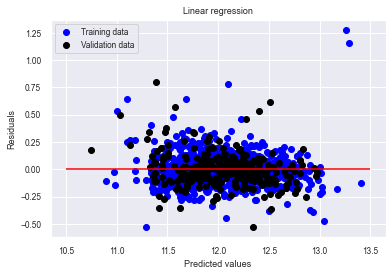

In [82]:
plt.scatter(lr_train_pre, lr_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(lr_test_pre,lr_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

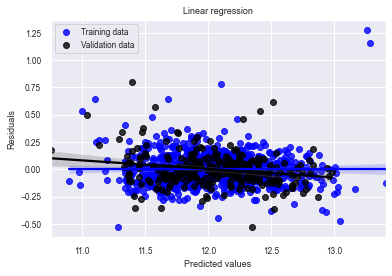

In [83]:
sns.regplot(lr_train_pre, lr_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(lr_test_pre,lr_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# SGDRegressor before scaled - bs

In [84]:
from sklearn.linear_model import SGDRegressor

In [85]:
sgdc_bs=SGDRegressor(
    loss='squared_loss',
    alpha=0.25,
    #fit_intercept=False,
    max_iter=200,
    learning_rate='adaptive',
    #power_t=0.50,
    #validation_fraction=0.50,
    #class_weight='balanced',
    eta0=0.50
    
)

In [86]:
sgdc_bs.fit(X_train,y_train)

SGDRegressor(alpha=0.25, eta0=0.5, learning_rate='adaptive', max_iter=200)

In [87]:
ypredictsgdc_bs=sgdc_bs.predict(X_test)

In [88]:
from sklearn.metrics import r2_score
sgdc_bs_acc=r2_score(y_test, ypredictsgdc_bs)

In [89]:
sgdc_bs_acc

-1.015072361630458e+25

# Standard Scaler

In [90]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [92]:
X = pca.fit(X_train)

In [93]:
explained_variance = pca.explained_variance_ratio_

In [94]:
print(X.components_)

[[ 1.00000000e+00  8.90682486e-17  8.59969297e-17 ...  9.98178648e-18
  -1.43168252e-18 -3.63717224e-33]
 [-8.90682486e-17  1.00000000e+00 -1.44328993e-15 ...  4.61870125e-17
  -6.26126755e-18 -1.89704100e-32]
 [-8.59969297e-17  1.49880108e-15  1.00000000e+00 ... -7.80625564e-17
   1.86482774e-17  2.50370893e-32]
 ...
 [-9.98178648e-18  8.32667268e-17  1.11022302e-16 ...  1.00000000e+00
  -4.16333634e-16 -1.15738522e-20]
 [ 1.43168252e-18 -1.73472348e-17 -1.56125113e-17 ...  4.30211422e-16
   1.00000000e+00 -1.76376287e-22]
 [ 3.63717224e-33 -5.08445505e-32 -7.39557099e-32 ...  3.64258781e-24
   4.49133026e-28  1.00000000e+00]]


In [95]:
explained_variance.shape

(61,)

# ElasticNet

In [96]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [97]:
#X_train, y_train = make_regression(n_features=1,random_state=0)
en = ElasticNet(
    alpha=0.001,
    l1_ratio=0.10,
    max_iter=1000,
    random_state=0)

In [98]:
en.fit(X_train,y_train)

ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=0)

In [99]:
ypredicten=en.predict(X_test)

In [100]:
from sklearn.metrics import r2_score
en_acc=round(r2_score(y_test, ypredicten),2)

In [101]:
en_acc

0.88

In [102]:
from sklearn.metrics import mean_squared_error
en_mse=mean_squared_error(y_test,ypredicten) 
en_mse

0.023113058037587876

In [103]:
from sklearn.metrics import mean_absolute_error
en_mae=mean_absolute_error(y_test,ypredicten) 
en_mae

0.10617001889928662

In [104]:
en.score(X_test,y_test)

0.8841459810113369

In [105]:
from sklearn.metrics import mean_squared_error
en_rmse=get_rmse(y_test,ypredicten)
en_rmse

0.15202979325641364

In [106]:
from sklearn.metrics import mean_absolute_error
en_mae=mean_absolute_error(y_test,ypredicten) 
en_mae

0.10617001889928662

In [107]:
print('rmse on train',rmse_CV_train(en).mean())
print('rmse on train',rmse_CV_test(en).mean())

rmse on train 0.1410774126749841
rmse on train 0.16874081250991357


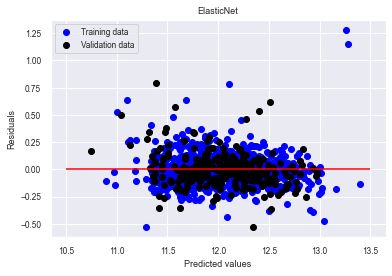

In [108]:
en_test_pre = en.predict(X_test)
en_train_pre = en.predict(X_train)
#plot between predicted values and residuals
plt.scatter(en_train_pre, en_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(en_test_pre,en_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

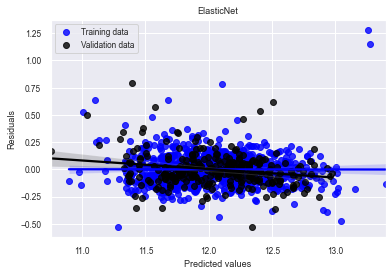

In [109]:
sns.regplot(en_train_pre, en_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(en_test_pre,en_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression
lr_scaled=LinearRegression()

In [111]:
lr_scaled.fit(X_train,y_train)

LinearRegression()

In [112]:
ypredictlr_scaled=lr_scaled.predict(X_test)

In [113]:
from sklearn.metrics import r2_score
lr_scaled_acc=round(r2_score(y_test, ypredictlr_scaled),2)

In [114]:
lr_scaled_acc

0.88

In [115]:
mean_squared_error(y_test,ypredictlr_scaled) 

0.02312791476791698

In [116]:
lr_scaled.score(X_test,y_test)

0.8840715117691077

In [117]:
lr_scaled.score(X_train,y_train)

0.8895335195638486

In [118]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test,ypredictlr_scaled)

0.00014132969518585735

In [119]:
get_rmse(y_test,ypredictlr_scaled)

0.1520786466533582

In [120]:
#getting root mean square error
lr_scaled_rmse=get_rmse(y_test,ypredictlr_scaled)
lr_scaled_rmse

0.1520786466533582

In [121]:
from sklearn.metrics import mean_squared_error
lr_scaled_mse=mean_squared_error(y_test,ypredictlr_scaled) 
lr_scaled_mse

0.02312791476791698

In [122]:
from sklearn.metrics import mean_absolute_error
lr_scaled_mae=mean_absolute_error(y_test,ypredicten) 
lr_scaled_mae

0.10617001889928662

In [123]:
print('rmse on train',rmse_CV_train(lr_scaled).mean())
print('rmse on test',rmse_CV_test(lr_scaled).mean())

rmse on train 88047952.96284164
rmse on test 0.1695624665516453


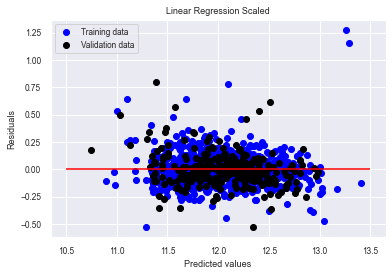

In [124]:
lr_scaled_test_pre = lr_scaled.predict(X_test)
lr_scaled_train_pre = lr_scaled.predict(X_train)
#plot between predicted values and residuals
plt.scatter(lr_scaled_train_pre, lr_scaled_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(lr_scaled_test_pre,lr_scaled_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear Regression Scaled")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

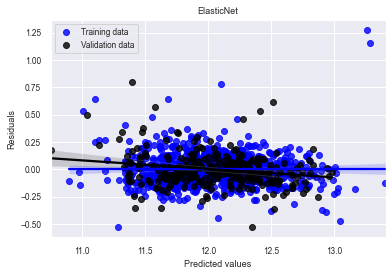

In [125]:
sns.regplot(lr_scaled_train_pre, lr_scaled_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(lr_scaled_test_pre,lr_scaled_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# SVR

In [126]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [127]:
ypredictsvr = svr.predict(X_test)

In [128]:
from sklearn.metrics import r2_score
svr_acc=round(r2_score(y_test, ypredictsvr),2)

In [129]:
svr_acc

0.82

In [130]:
mean_squared_error(y_test,ypredictsvr) 

0.03558419734824485

In [131]:
svr.score(X_train,y_train)

0.957556121659599

In [132]:
svr.score(X_test,y_test)

0.8216344947269412

In [133]:
#getting root mean square error
svr_rmse=get_rmse(y_test,ypredictsvr)
svr_rmse

0.18863774104946457

In [134]:
svr_mae=mean_absolute_error(y_test,ypredictsvr) 
svr_mae

0.1190678930827214

In [135]:
svr_mse=mean_squared_error(y_test,ypredictsvr)
svr_mse

0.03558419734824485

In [136]:
print('rmse on train',rmse_CV_train(svr).mean())
print('rmse on test',rmse_CV_test(svr).mean())

rmse on train 0.17472352127091947
rmse on test 0.21501385673684625


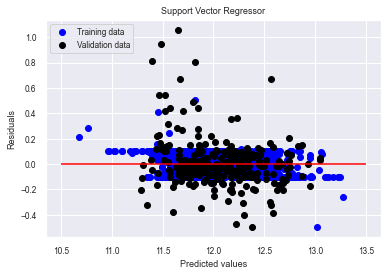

In [137]:
svr_test_pre = svr.predict(X_test)
svr_train_pre = svr.predict(X_train)
#plot between predicted values and residuals
plt.scatter(svr_train_pre,svr_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(svr_test_pre,svr_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Support Vector Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

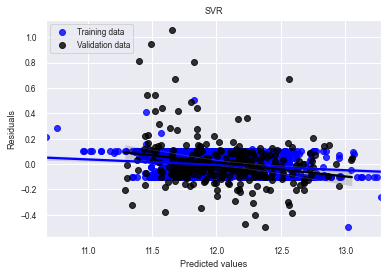

In [138]:
sns.regplot(svr_train_pre, svr_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(svr_test_pre,svr_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("SVR")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# MLPRegressor

In [139]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    activation='identity',
    batch_size=400,
    max_iter=500,
    max_fun=5000,
    learning_rate_init=0.10
    
)

In [140]:
mlp.fit(X_train, y_train)

MLPRegressor(activation='identity', batch_size=400, learning_rate_init=0.1,
             max_fun=5000, max_iter=500)

In [141]:
ypredictmlp = mlp.predict(X_test)

In [142]:
from sklearn.metrics import r2_score
mlp_acc=round(r2_score(y_test, ypredictmlp),2)

In [143]:
mlp_acc

0.76

In [144]:
mean_squared_error(y_test,ypredictmlp) 

0.04809856799116748

In [145]:
mlp.score(X_train,y_train)

0.762458974974474

In [146]:
mlp.score(X_test,y_test)

0.7589063117345172

In [147]:
#getting root mean square error
mlp_rmse=get_rmse(y_test,ypredictmlp)
mlp_rmse

0.21931385727118904

In [148]:
mlp_mse=mean_squared_error(y_test,ypredictmlp)
mlp_mse

0.04809856799116748

In [149]:
mlp_mae=mean_absolute_error(y_test,ypredictmlp) 
mlp_mae

0.1557629804359216

In [150]:
print('rmse on train',rmse_CV_train(mlp).mean())
print('rmse on test',rmse_CV_test(mlp).mean())

rmse on train 1.1371355631498394
rmse on test 0.16869579072593716


In [151]:
mlp_test_pre = mlp.predict(X_test)
mlp_train_pre = mlp.predict(X_train)

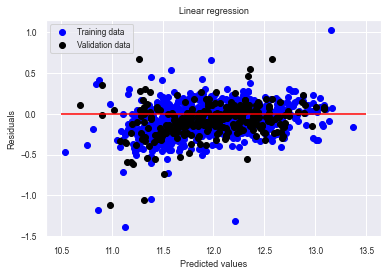

In [152]:
#plot between predicted values and residuals
plt.scatter(mlp_train_pre, mlp_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(mlp_test_pre,mlp_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

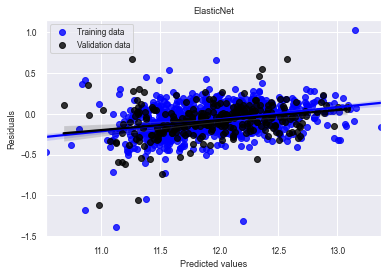

In [153]:
sns.regplot(mlp_train_pre, mlp_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(mlp_test_pre,mlp_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Lasso

In [154]:
from sklearn.linear_model import Lasso
lasso=Lasso(
    selection='random',
    normalize=False,
    fit_intercept=True,
    alpha=0.50,
    max_iter=250,
    tol=0.10
)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5, max_iter=250, selection='random', tol=0.1)

In [155]:
ypredictls=lasso.predict(X_test)

In [156]:
from sklearn.metrics import r2_score
ls_acc=round(r2_score(y_test, ypredictls),2)

In [157]:
ls_acc

0.59

In [158]:
mean_squared_error(y_test,ypredictls)

0.08267833274816373

In [159]:
lasso.score(X_train,y_train)

0.6094190462383133

In [160]:
lasso.score(X_test,y_test)

0.5855755168104786

In [161]:
#getting root mean square error
ls_rmse=get_rmse(y_test,ypredictls)
ls_rmse

0.2875384022146672

In [162]:
ls_mse=mean_squared_error(y_test,ypredictls)
ls_mse

0.08267833274816373

In [163]:
ls_mae=mean_absolute_error(y_test,ypredictls) 
ls_mae

0.21112183978069346

In [164]:
print('rmse on train',rmse_CV_train(lasso).mean())
print('rmse on test',rmse_CV_test(lasso).mean())

rmse on train 0.24167076848728705
rmse on test 0.2528328658675474


In [165]:
ls_test_pre = lasso.predict(X_test)
ls_train_pre = lasso.predict(X_train)

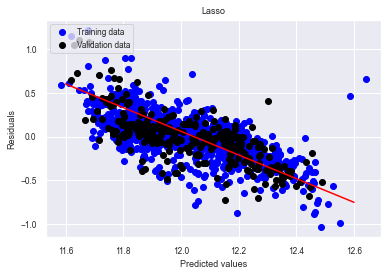

In [166]:
#plot between predicted values and residuals
plt.scatter(ls_train_pre, ls_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(ls_test_pre,ls_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Lasso")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.plot([11.6,12.6], [0.6, -0.75], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

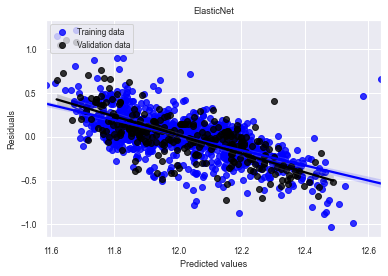

In [167]:
sns.regplot(ls_train_pre, ls_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(ls_test_pre,ls_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Ridge

In [168]:
from sklearn.linear_model import Ridge
ridge=Ridge(
    solver='svd',
    alpha=0.50,
    max_iter=250,
    tol=0.10
)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, max_iter=250, solver='svd', tol=0.1)

In [169]:
ypredictrd=ridge.predict(X_test)

In [170]:
from sklearn.metrics import r2_score
rd_acc=round(r2_score(y_test, ypredictrd),2)

In [171]:
rd_acc

0.88

In [172]:
mean_squared_error(y_test,ypredictrd)

0.02312674233950376

In [173]:
ridge.score(X_train,y_train)

0.8895174608742956

In [174]:
ridge.score(X_test,y_test)

0.8840773885571739

In [175]:
#getting root mean square error
rd_rmse=get_rmse(y_test,ypredictrd)
rd_rmse

0.15207479192655093

In [176]:
rd_mse=mean_squared_error(y_test,ypredictrd)
rd_mse

0.02312674233950376

In [177]:
rd_mae=mean_absolute_error(y_test,ypredictrd) 
rd_mae

0.10620441299342147

In [178]:
print('rmse on train',rmse_CV_train(ridge).mean())
print('rmse on test',rmse_CV_test(ridge).mean())

rmse on train 0.14118063534600528
rmse on test 0.16919775443491963


In [179]:
rd_test_pre = ridge.predict(X_test)
rd_train_pre = ridge.predict(X_train)

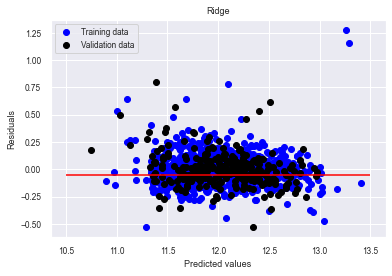

In [180]:
#plot between predicted values and residuals
plt.scatter(rd_train_pre, rd_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(rd_test_pre,rd_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Ridge")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([11.6,12.6], [0.6, -0.75], c = "red")
plt.hlines(y = -0.05, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

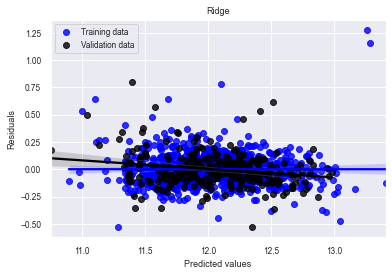

In [181]:
sns.regplot(rd_train_pre, rd_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(rd_test_pre,rd_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Ridge")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# ExtraTreesRegressor

In [182]:
from sklearn.ensemble import ExtraTreesRegressor

In [183]:
etc = ExtraTreesRegressor(
    n_estimators=10)
etc.fit(X_train, y_train)
print(etc.feature_importances_)

[0.76369406 0.00547061 0.0323707  0.00877926 0.00326582 0.0062074
 0.00516615 0.00682479 0.00327545 0.00421768 0.00599293 0.0027796
 0.00128678 0.00312524 0.00370311 0.00269386 0.00266917 0.00143666
 0.0015123  0.00360784 0.00658124 0.00269203 0.00246711 0.00215833
 0.00174651 0.00258797 0.005314   0.00293402 0.00217148 0.00284734
 0.00178601 0.00248374 0.0038904  0.00337182 0.00160298 0.00231217
 0.00342436 0.0034088  0.00362403 0.00200044 0.0037309  0.00265589
 0.00281303 0.00178784 0.00326777 0.00430029 0.00158581 0.00259259
 0.00729642 0.00219184 0.00245138 0.00456112 0.00547327 0.0038139
 0.00258168 0.00153606 0.00336457 0.00205272 0.00327073 0.01118799
 0.        ]


In [184]:
ypredictetc=etc.predict(X_test)

In [185]:
from sklearn.metrics import r2_score
etc_acc=round(r2_score(y_test, ypredictetc),2)

In [186]:
etc_acc

0.85

In [187]:
mean_squared_error(y_test,ypredictetc)

0.029796154832302812

In [188]:
etc.score(X_train,y_train)

1.0

In [189]:
etc.score(X_test,y_test)

0.850647011653893

In [190]:
#getting root mean square error
etc_rmse=get_rmse(y_test,ypredictetc)
etc_rmse

0.17261562742782824

In [191]:
etc_mse=mean_squared_error(y_test,ypredictetc)
etc_mse

0.029796154832302812

In [192]:
etc_mae=mean_absolute_error(y_test,ypredictetc) 
etc_mae

0.1192805177649203

In [193]:
print('rmse on train',rmse_CV_train(etc).mean())
print('rmse on test',rmse_CV_test(etc).mean())

rmse on train 0.158767513004147
rmse on test 0.19348442706284694


In [194]:
etc_test_pre = etc.predict(X_test)
etc_train_pre = etc.predict(X_train)

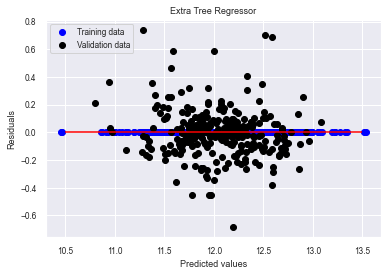

In [195]:
#plot between predicted values and residuals
plt.scatter(etc_train_pre, etc_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(etc_test_pre,etc_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Extra Tree Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([11.6,12.6], [0.6, -0.75], c = "red")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

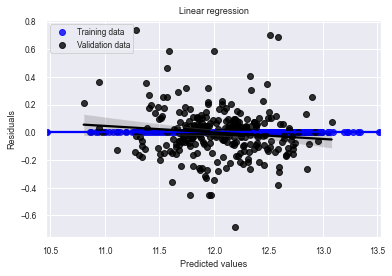

In [196]:
sns.regplot(etc_train_pre, etc_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(etc_test_pre,etc_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# XGBRegressor

In [197]:
from xgboost import XGBRegressor

In [198]:
xgb = XGBRegressor(
    booster='gblinear',
    #gamma=0.05,
    #max_depth=4,
    learning_rate=0.10,
    feature_selector='cyclic',
    updater='coord_descent',
    eval_metric='rmse'
)
xgb.fit(X_train,y_train)
ypredictxgb= xgb.predict(X_test)

In [199]:
from sklearn.metrics import r2_score
xgb_acc=round(r2_score(y_test, ypredictxgb),2)

In [200]:
xgb_acc

0.88

In [201]:
mean_squared_error(y_test,ypredictxgb)

0.023127355734582317

In [202]:
xgb.score(X_train,y_train)

0.8895168759480805

In [203]:
xgb.score(X_test,y_test)

0.8840743139192371

In [204]:
#getting root mean square error
xgb_rmse=get_rmse(y_test,ypredictxgb)
xgb_rmse

0.1520768086677989

In [205]:
xgb_mse=mean_squared_error(y_test,ypredictxgb)
xgb_mse

0.023127355734582317

In [206]:
xgb_mae=mean_absolute_error(y_test,ypredictxgb) 
xgb_mae

0.10622857385386676

In [207]:
print('rmse on train',rmse_CV_train(xgb).mean())
print('rmse on test',rmse_CV_test(xgb).mean())

rmse on train 0.27020844421537327
rmse on test 0.3547945235622178


In [208]:
xgb_test_pre = xgb.predict(X_test)
xgb_train_pre = xgb.predict(X_train)

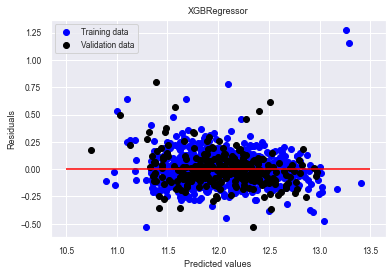

In [209]:
#plot between predicted values and residuals
plt.scatter(xgb_train_pre, xgb_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(xgb_test_pre,xgb_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("XGBRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([11.6,12.6], [0.6, -0.75], c = "red")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

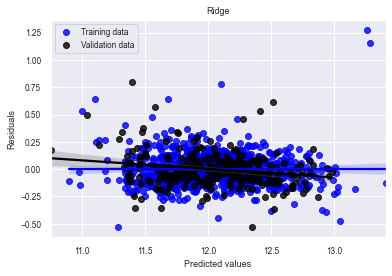

In [210]:
sns.regplot(xgb_train_pre, xgb_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(xgb_test_pre,xgb_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Ridge")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# SGDRegressor

In [211]:
from sklearn.linear_model import SGDRegressor

In [212]:
sgdc=SGDRegressor(
    loss='squared_loss',
    alpha=0.25,
    #fit_intercept=False,
    max_iter=200,
    learning_rate='adaptive',
    #power_t=0.50,
    #validation_fraction=0.50,
    #class_weight='balanced',
    eta0=0.50
    
)

In [213]:
sgdc.fit(X_train,y_train)

SGDRegressor(alpha=0.25, eta0=0.5, learning_rate='adaptive', max_iter=200)

In [214]:
ypredictsgdc=sgdc.predict(X_test)

In [215]:
from sklearn.metrics import r2_score
sgdc_acc=round(r2_score(y_test, ypredictsgdc),2)

In [216]:
sgdc_acc

0.87

In [217]:
sgdc.score(X_train,y_train)

0.8817205766136951

In [218]:
sgdc.score(X_test,y_test)

0.8738759617934928

In [219]:
#getting root mean square error
sgdc_rmse=get_rmse(y_test,ypredictsgdc)
sgdc_rmse

0.1586251648970457

In [220]:
sgdc_mse=mean_squared_error(y_test,ypredictsgdc)
sgdc_mse

0.025161942938614935

In [221]:
sgdc_mae=mean_absolute_error(y_test,ypredictsgdc) 
sgdc_mae

0.11206008700858948

In [222]:
sgdc_test_pre = sgdc.predict(X_test)
sgdc_train_pre = sgdc.predict(X_train)
print('rmse on train',rmse_CV_train(sgdc).mean())
print('rmse on test',rmse_CV_test(sgdc).mean())

rmse on train 0.1411881820147402
rmse on test 0.15685325711470915


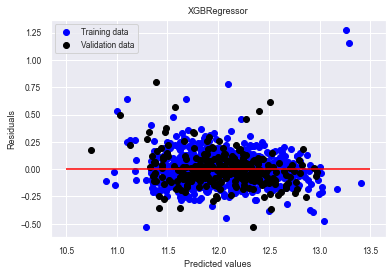

In [223]:
#plot between predicted values and residuals
plt.scatter(xgb_train_pre, xgb_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(xgb_test_pre,xgb_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("XGBRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([11.6,12.6], [0.6, -0.75], c = "red")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

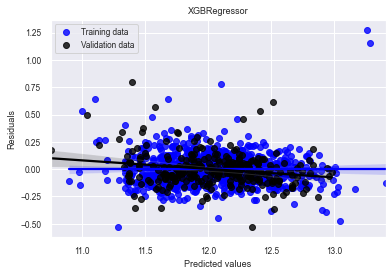

In [224]:
sns.regplot(xgb_train_pre, xgb_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(xgb_test_pre,xgb_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("XGBRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# LiteGBM

In [225]:
from lightgbm import LGBMRegressor

In [226]:
lgbm=LGBMRegressor(
    boosting_type='gbdt',
    max_depth=16,
    learning_rate=0.25,
    num_leaves=64
)

In [227]:
lgbm.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.25, max_depth=16, num_leaves=64)

In [228]:
ypredictlgbm=lgbm.predict(X_test)

In [229]:
from sklearn.metrics import r2_score
lgbm_acc=round(r2_score(y_test, ypredictlgbm),2)

In [230]:
lgbm_acc

0.85

In [231]:
mean_squared_error(y_test,ypredictlgbm)

0.02955851106463275

In [232]:
lgbm.score(X_train,y_train)

0.999512606521193

In [233]:
lgbm.score(X_test,y_test)

0.8518381991431214

In [234]:
#getting root mean square error
lgbm_rmse=get_rmse(y_test,ypredictlgbm)
lgbm_rmse

0.17192588829095154

In [235]:
lgbm_mse=mean_squared_error(y_test,ypredictlgbm)
lgbm_mse

0.02955851106463275

In [236]:
lgbm_mae=mean_absolute_error(y_test,ypredictlgbm) 
lgbm_mae

0.12066640933570431

In [237]:
print('rmse on train',rmse_CV_train(lgbm).mean())
print('rmse on test',rmse_CV_test(lgbm).mean())

rmse on train 0.15816989279285884
rmse on test 0.19143204006931475


In [238]:
lgbm_test_pre = lgbm.predict(X_test)
lgbm_train_pre = lgbm.predict(X_train)

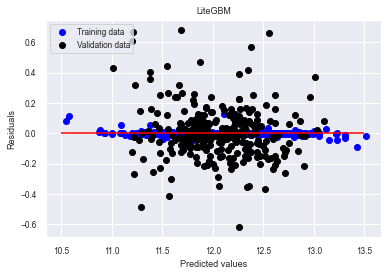

In [239]:
#plot between predicted values and residuals
plt.scatter(lgbm_train_pre, lgbm_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(lgbm_test_pre,lgbm_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("LiteGBM")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([11.6,12.6], [0.6, -0.75], c = "red")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

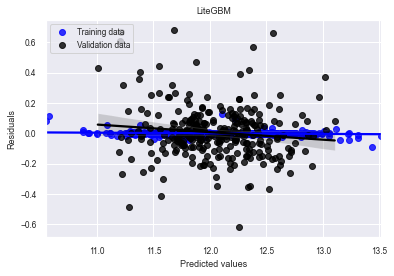

In [240]:
sns.regplot(lgbm_train_pre, lgbm_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(lgbm_test_pre,lgbm_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("LiteGBM")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# GradientBoostingRegressor

In [241]:
from sklearn.ensemble import GradientBoostingRegressor

In [242]:
gbc = GradientBoostingRegressor(
    #loss='deviance',
    criterion='mse',
    learning_rate=0.25,
    n_estimators=200,
    subsample=0.50,
    max_features='sqrt',
    max_depth=16,
    verbose=0
)

In [243]:
gbc.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.25, max_depth=16,
                          max_features='sqrt', n_estimators=200, subsample=0.5)

In [244]:
ypredictgbc=gbc.predict(X_test)

In [245]:
from sklearn.metrics import r2_score
gbc_acc=round(r2_score(y_test, ypredictgbc),2)

In [246]:
gbc_acc

0.69

In [247]:
mean_squared_error(y_test,ypredictgbc)

0.0624349919796094

In [248]:
#getting root mean square error
gbc_rmse=get_rmse(y_test,ypredictgbc)
gbc_rmse

0.24986995013328314

In [249]:
gbc_mse=mean_squared_error(y_test,ypredictgbc)
gbc_mse

0.0624349919796094

In [250]:
gbc_mae=mean_absolute_error(y_test,ypredictgbc) 
gbc_mae

0.17646759310331195

In [251]:
print('rmse on train',rmse_CV_train(gbc).mean())
print('rmse on test',rmse_CV_test(gbc).mean())

rmse on train 0.2263997524892977
rmse on test 0.2979942655165728


In [252]:
gbc_test_pre = gbc.predict(X_test)
gbc_train_pre = gbc.predict(X_train)

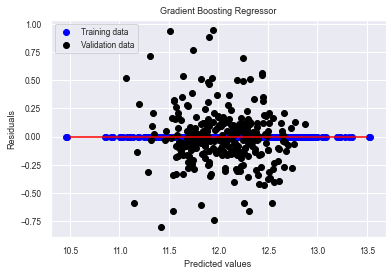

In [253]:
#plot between predicted values and residuals
plt.scatter(gbc_train_pre, gbc_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(gbc_test_pre,gbc_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Gradient Boosting Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([11.6,12.6], [0.6, -0.75], c = "red")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

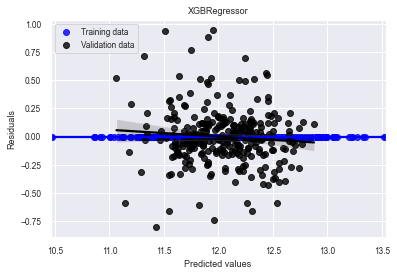

In [254]:
sns.regplot(gbc_train_pre, gbc_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(gbc_test_pre,gbc_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("XGBRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# CatBoostRegressor

In [255]:
from catboost import CatBoostRegressor

In [256]:
cb=CatBoostRegressor(
    loss_function="RMSE",
    task_type="CPU",
    learning_rate=0.10,
    iterations=500,
    l2_leaf_reg=5,
    depth=7,
    silent=True
                                                   
)
cb.fit(X_train,y_train)

In [257]:
ypredictcb=cb.predict(X_test)

In [258]:
from sklearn.metrics import r2_score
cb_acc=round(r2_score(y_test, ypredictcb),2)

In [259]:
cb_acc

0.87

In [260]:
mean_squared_error(y_test,ypredictcb)

0.025935867451901

In [261]:
cb.score(X_train,y_train)

0.9995222890016029

In [262]:
cb.score(X_test,y_test)

0.8699966713459795

In [263]:
#getting root mean square error
cb_rmse=get_rmse(y_test,ypredictcb)
cb_rmse

0.16104616559204693

In [264]:
cb_mse=mean_squared_error(y_test,ypredictcb)
cb_mse

0.025935867451901

In [265]:
cb_mae=mean_absolute_error(y_test,ypredictcb) 
cb_mae

0.10444047113869995

In [266]:
print('rmse on train',rmse_CV_train(cb).mean())
print('rmse on test',rmse_CV_test(cb).mean())

rmse on train 0.1543023368669773
rmse on test 0.20817037290677015


In [267]:
cb_test_pre = cb.predict(X_test)
cb_train_pre = cb.predict(X_train)

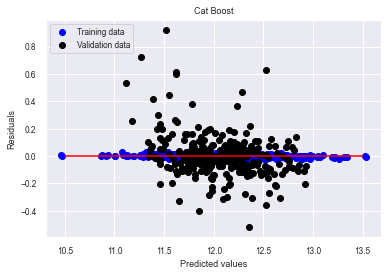

In [268]:
#plot between predicted values and residuals
plt.scatter(cb_train_pre, cb_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(cb_test_pre,cb_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Cat Boost")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([11.6,12.6], [0.6, -0.75], c = "red")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

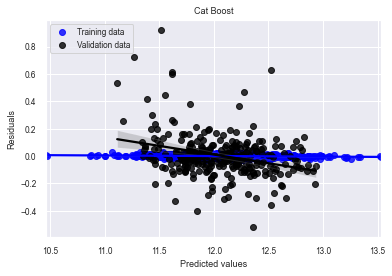

In [269]:
sns.regplot(cb_train_pre, cb_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(cb_test_pre,cb_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Cat Boost")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# KNN

In [270]:
from sklearn.neighbors import KNeighborsRegressor

In [271]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [272]:
ypredictknn = knn.predict(X_test)

In [273]:
from sklearn.metrics import r2_score
knn_acc=round(r2_score(y_test, ypredictknn),2)

In [274]:
knn_acc

0.78

In [275]:
mean_squared_error(y_test,ypredictknn)

0.04434999799460962

In [276]:
#getting root mean square error
knn_rmse=get_rmse(y_test,ypredictknn)
knn_rmse

0.21059439212526437

In [277]:
knn_mse=mean_squared_error(y_test,ypredictknn)
knn_mse

0.04434999799460962

In [278]:
knn_mae=mean_absolute_error(y_test,ypredictknn) 
knn_mae

0.14849348392010558

In [279]:
print('rmse on train',rmse_CV_train(knn).mean())
print('rmse on test',rmse_CV_test(knn).mean())

rmse on train 0.1875293907562739
rmse on test 0.2234280705221349


In [280]:
knn_test_pre = knn.predict(X_test)
knn_train_pre = knn.predict(X_train)

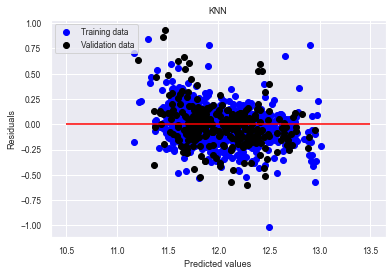

In [281]:
#plot between predicted values and residuals
plt.scatter(knn_train_pre, knn_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(knn_test_pre,knn_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("KNN")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([11.6,12.6], [0.6, -0.75], c = "red")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

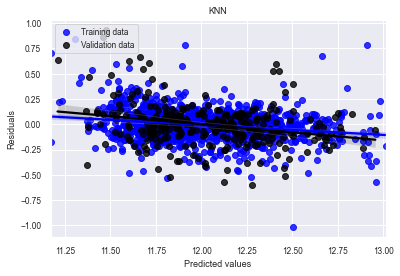

In [282]:
sns.regplot(knn_train_pre, knn_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(knn_test_pre,knn_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("KNN")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Random Forest Regressor

In [283]:
from sklearn.ensemble import RandomForestRegressor

In [284]:
rfc=RandomForestRegressor(
    n_estimators=120,
    max_depth=25,
    random_state=25
)
rfc.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=120, random_state=25)

In [285]:
ypredictrfc = rfc.predict(X_test)

In [286]:
from sklearn.metrics import r2_score
rfc_acc=round(r2_score(y_test, ypredictrfc),2)

In [287]:
rfc_acc

0.86

In [288]:
from sklearn.metrics import mean_squared_log_error
rfc_rmse=get_rmse(y_test,ypredictrfc)
rfc_rmse

0.16762136032838346

In [289]:
rfc_mse=mean_squared_error(y_test,ypredictrfc)
rfc_mse

0.028096920438337766

In [290]:
rfc_mae=mean_absolute_error(y_test,ypredictrfc) 
rfc_mae

0.11761244443114559

In [291]:
print('rmse on train',rmse_CV_train(rfc).mean())
print('rmse on test',rmse_CV_test(rfc).mean())

rmse on train 0.15584353082926333
rmse on test 0.19230671814369654


In [292]:
rfc_test_pre = rfc.predict(X_test)
rfc_train_pre = rfc.predict(X_train)

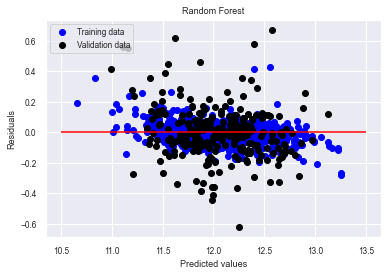

In [293]:
#plot between predicted values and residuals
plt.scatter(rfc_train_pre, rfc_train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(rfc_test_pre,rfc_test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Random Forest")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([11.6,12.6], [0.6, -0.75], c = "red")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

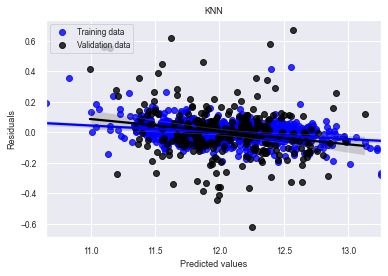

In [294]:
sns.regplot(rfc_train_pre, rfc_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(rfc_test_pre,rfc_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("KNN")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Model Performance

In [295]:
index=['Accuracy','RMSE','MSE','MAE']
test_perf_data = pd.DataFrame({'LR':[lr_acc,lr_rmse,lr_mse,lr_mae], 
                     'ElasticNet':[en_acc,en_rmse,en_mse,en_mae],
                     'LR scaled':[lr_scaled_acc,lr_scaled_rmse,lr_scaled_mse,lr_scaled_mae],
                     'SVR':[svr_acc,svr_rmse,svr_mse,svr_mae],
                     'MLPR':[xgb_acc,xgb_rmse,xgb_mse,xgb_mae],
                     'Lasso':[ls_acc,ls_rmse,ls_mse,ls_mae],
                     'Ridge':[rd_acc,rd_rmse,rd_mse,rd_mae],
                     'ExtraTress':[etc_acc,etc_rmse,etc_mse,etc_mae],
                     'XGBRegressor':[xgb_acc,xgb_rmse,xgb_mse,xgb_mae],
                     'SGDRegressor':[sgdc_acc,sgdc_rmse,sgdc_mse,sgdc_mae],
                     'LiteGBM':[lgbm_acc,lgbm_rmse,lgbm_mse,lgbm_mae],
                     'GBRegressor':[gbc_acc,gbc_rmse,gbc_mse,gbc_mae],
                     'CatBoost':[cb_acc,cb_rmse,cb_mse,cb_mae],
                     'RF':[rfc_acc,rfc_rmse,rfc_mse,rfc_mae],        
                     },index=index)
round(test_perf_data,4)

,LR,ElasticNet,LR scaled,SVR,MLPR,Lasso,Ridge,ExtraTress,XGBRegressor,SGDRegressor,LiteGBM,GBRegressor,CatBoost,RF
Accuracy,0.8800,0.8800,0.8800,0.8200,0.8800,0.5900,0.8800,0.8500,0.8800,0.8700,0.8500,0.6900,0.8700,0.8600
RMSE,0.1521,0.1520,0.1521,0.1886,0.1521,0.2875,0.1521,0.1726,0.1521,0.1586,0.1719,0.2499,0.1610,0.1676
MSE,0.0165,0.0231,0.0231,0.0356,0.0231,0.0827,0.0231,0.0298,0.0231,0.0252,0.0296,0.0624,0.0259,0.0281
MAE,0.1062,0.1062,0.1062,0.1191,0.1062,0.2111,0.1062,0.1193,0.1062,0.1121,0.1207,0.1765,0.1044,0.1176


# Comparison plot: all models

In [310]:
model_acc = [lr_acc, en_acc, lr_scaled_acc, svr_acc,mlp_acc,ls_acc,rd_acc,etc_acc,xgb_acc,sgdc_acc,lgbm_acc,gbc_acc,cb_acc,rfc_acc]
list_model = ['Linear','ElasticNet','LR scaled','SVR','MLPR','Lasso','Ridge','ExtraTress','XGBRegressor','SGDRegressor','LiteGBM','GBRegressor','CatBoost','RF']

In [329]:
model_comp = pd.DataFrame({"Model": list_model,
                          "Model_Score": model_acc}) 

In [340]:
model_comp=model_comp.sort_values('Model_Score',ascending=True)

In [342]:
model_comp

,Model,Model_Score
5,Lasso,0.59
11,GBRegressor,0.69
4,MLPR,0.76
3,SVR,0.82
7,ExtraTress,0.85
10,LiteGBM,0.85
13,RF,0.86
9,SGDRegressor,0.87
12,CatBoost,0.87
0,Linear,0.88


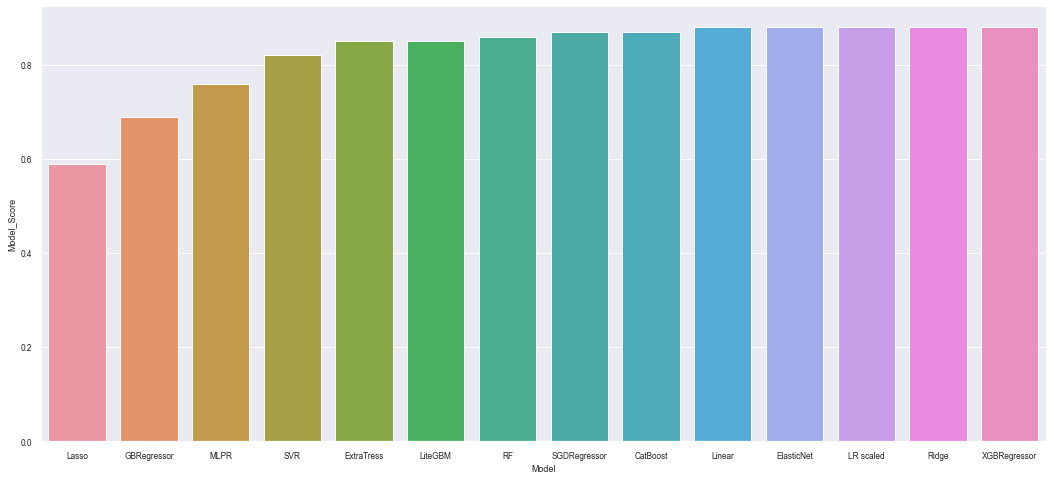

In [341]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model', y="Model_Score", data=model_comp)
plt.show()

# RMSE Comparison

In [298]:
rmse = [lr_rmse, en_rmse, lr_scaled_rmse, svr_rmse,mlp_rmse,ls_rmse,rd_rmse,etc_rmse,xgb_rmse,sgdc_rmse,lgbm_rmse,gbc_rmse,cb_rmse,rfc_rmse]
list_model = ['Linear','ElasticNet','LR scaled','SVR','MLPR','Lasso','Ridge','ExtraTress','XGBRegressor','SGDRegressor','LiteGBM','GBRegressor','CatBoost','RF']

In [343]:
rmse_comp=pd.DataFrame({'Model':list_model,
                       'RMSE':rmse})

In [347]:
rmse_comp=rmse_comp.sort_values('RMSE',ascending=True)

In [348]:
rmse_comp

,Model,RMSE
1,ElasticNet,0.152030
0,Linear,0.152074
6,Ridge,0.152075
8,XGBRegressor,0.152077
2,LR scaled,0.152079
9,SGDRegressor,0.158625
12,CatBoost,0.161046
13,RF,0.167621
10,LiteGBM,0.171926
7,ExtraTress,0.172616


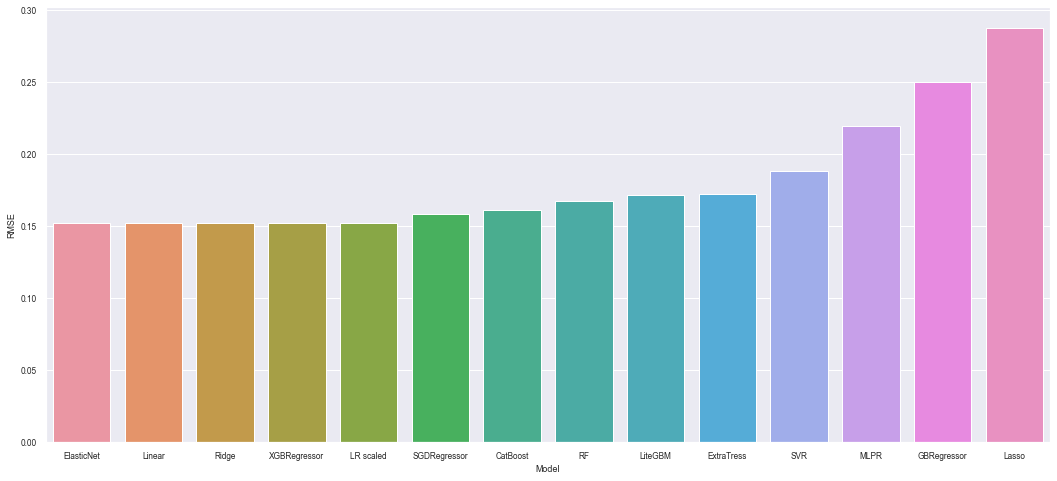

In [349]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model', y="RMSE", data=rmse_comp)
plt.show()

# MSE Comaprison

In [360]:
model_mse = [lr_mse, en_mse, lr_scaled_mse, svr_mse,mlp_mse,ls_mse,rd_mse,etc_mse,xgb_mse,sgdc_mse,lgbm_mse,gbc_mse,cb_mse,rfc_mse]
list_model = ['Linear','ElasticNet','LR scaled','SVR','MLPR','Lasso','Ridge','ExtraTress','XGBRegressor','SGDRegressor','LiteGBM','GBRegressor','CatBoost','RF']

In [361]:
mse_comp=pd.DataFrame({'Model':list_model,
                      'MSE':model_mse})

In [362]:
mse_comp=mse_comp.sort_values('MSE', ascending=True)
mse_comp

,Model,MSE
0,Linear,0.016498
1,ElasticNet,0.023113
6,Ridge,0.023127
8,XGBRegressor,0.023127
2,LR scaled,0.023128
9,SGDRegressor,0.025162
12,CatBoost,0.025936
13,RF,0.028097
10,LiteGBM,0.029559
7,ExtraTress,0.029796


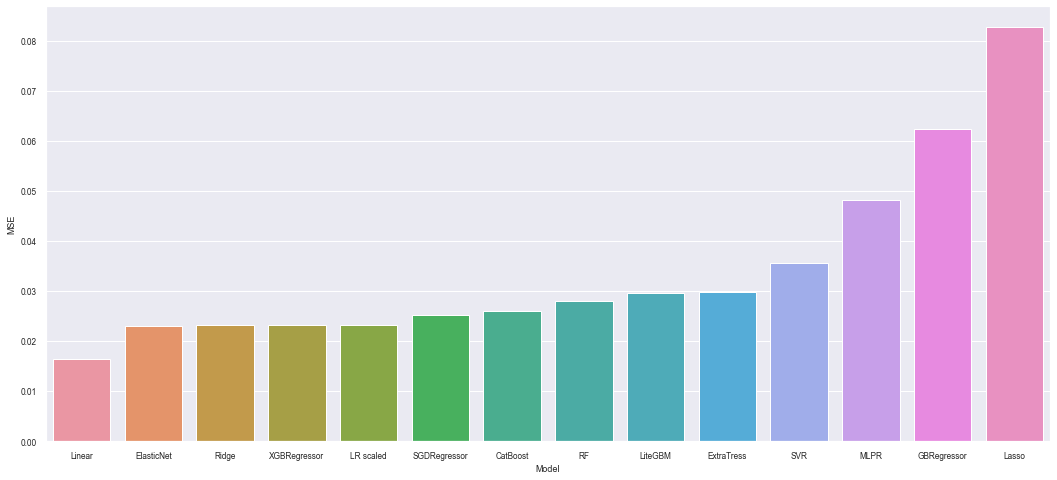

In [363]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model', y="MSE", data=mse_comp)
plt.show()

# MAE Comparison

In [308]:
model_mae = [lr_mae, en_mae, lr_scaled_mae, svr_mae,mlp_mae,ls_mae,rd_mae,etc_mae,xgb_mae,sgdc_mae,lgbm_mae,gbc_mae,cb_mae,rfc_mae]
list_model = ['Linear','ElasticNet','LR scaled','SVR','MLPR','Lasso','Ridge','ExtraTress','XGBRegressor','SGDRegressor','LiteGBM','GBRegressor','CatBoost','RF']

In [350]:
mae_comp=pd.DataFrame({'Model':list_model,
                      'MAE':model_mae})

In [352]:
mae_comp=mae_comp.sort_values('MAE',ascending=True)

In [353]:
mae_comp

,Model,MAE
12,CatBoost,0.104440
1,ElasticNet,0.106170
2,LR scaled,0.106170
0,Linear,0.106204
6,Ridge,0.106204
8,XGBRegressor,0.106229
9,SGDRegressor,0.112060
13,RF,0.117612
3,SVR,0.119068
7,ExtraTress,0.119281


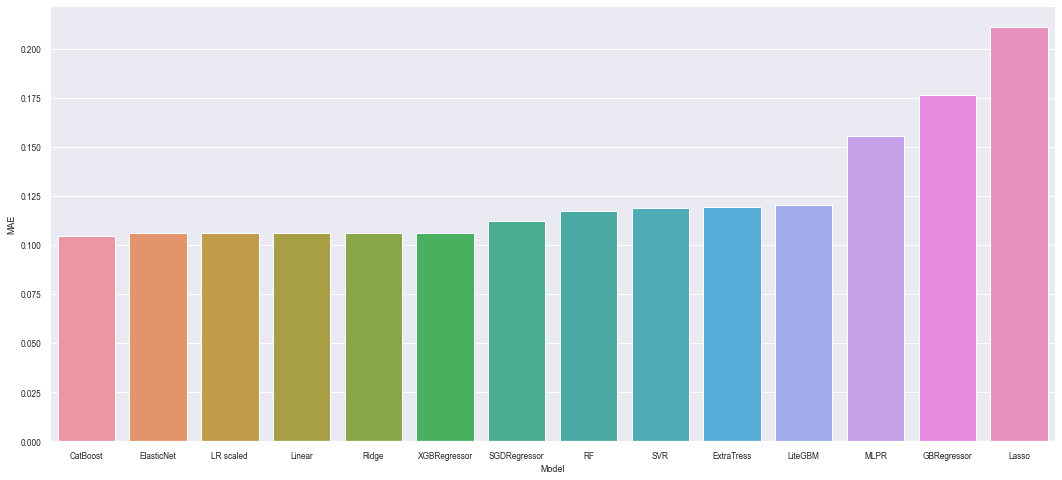

In [354]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model', y="MAE", data=mae_comp)
plt.show()

# Conclusion:

From the above 
1. Model comparison we can see the best performing model above 88% are Linear, Elastic Net, Linear Scaled , Ridge , XGBoost
2. Root Mean Square Error Comparison we can see the least error occured in Elastic Net, Ridge,Linear, XGBoost
3. Mean Square Error Comparison we can see the least error occured in Linear, Elastic Net, Ridge, XGBoost
4. Mean Absolute Error Comparison we can see the least error occured in CatBoost, ElasticNet, LR Scaled, Linear
From this we can select the best model are Elastic Net and Linear Regression both has 88% R-square and the least Root mean square is Elastic Net and the least Mean square is Linear Regression. So both model can perform well in the production level datas.